## load gears data

In [1]:
from gears import PertData, GEARS

In [2]:
import sys
import os

import pandas as pd
import scanpy as sc
import numpy as np
import warnings

import torch
import torch.nn.functional as F
import torch.nn as nn

from torch.utils.data import DataLoader, TensorDataset

import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import anndata
import seaborn as sns
import matplotlib.font_manager
from matplotlib import rcParams


In [4]:
# get data
pert_data = PertData('/hpc/mydata/siyu.he/Siyu_projects/squidward_study/perturb/data')
# load dataset in paper: norman, adamson, dixit.
pert_data.load(data_name = 'norman')


Found local copy...
Found local copy...
Found local copy...
These perturbations are not in the GO graph and their perturbation can thus not be predicted
['RHOXF2BB+ctrl' 'LYL1+IER5L' 'ctrl+IER5L' 'KIAA1804+ctrl' 'IER5L+ctrl'
 'RHOXF2BB+ZBTB25' 'RHOXF2BB+SET']
Local copy of pyg dataset is detected. Loading...
Done!


In [5]:
pert_data.adata

View of AnnData object with n_obs × n_vars = 89357 × 5045
    obs: 'condition', 'cell_type', 'dose_val', 'control', 'condition_name'
    var: 'gene_name'
    uns: 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'
    layers: 'counts'

In [10]:
pert_data.adata.obs['condition'].unique()

['TSC22D1+ctrl', 'KLF1+MAP2K6', 'ctrl', 'CEBPE+RUNX1T1', 'MAML2+ctrl', ..., 'STIL+ctrl', 'CDKN1C+ctrl', 'ctrl+CDKN1B', 'CDKN1B+CDKN1A', 'C3orf72+FOXL2']
Length: 277
Categories (277, object): ['AHR+FEV', 'AHR+KLF1', 'AHR+ctrl', 'ARID1A+ctrl', ..., 'ZC3HAV1+HOXC13', 'ZC3HAV1+ctrl', 'ZNF318+FOXL2', 'ZNF318+ctrl']

In [11]:
# specify data split
pert_data.prepare_split(split = 'simulation', seed = 1)
# get dataloader with batch size
pert_data.get_dataloader(batch_size = 32, test_batch_size = 128)

Local copy of split is detected. Loading...
Simulation split test composition:
combo_seen0:9
combo_seen1:43
combo_seen2:19
unseen_single:36
Done!
Creating dataloaders....
Done!


here1


In [12]:
pert_data.get_dataloader(batch_size = 32, test_batch_size = 128)

Creating dataloaders....
Done!


In [13]:
# set up and train a model
gears_model = GEARS(pert_data, device = 'cuda')
gears_model.model_initialize(hidden_size = 64)
#gears_model.train(epochs = 20)

# save/load model
#gears_model.save_model('gears')
gears_model.load_pretrained('gears')

# predict
gears_model.predict([['PTPN12']])
#gears_model.GI_predict(['CBL', 'CNN1'], GI_genes_file=None)

Found local copy...


{'PTPN12': array([ 2.6108787e-11,  7.3523089e-02,  1.0595970e-01, ...,
         3.3039443e+00,  1.8764349e-03, -4.5554573e-18], dtype=float32)}

In [14]:
gears_model.predict([['PTPN12']])

{'PTPN12': array([ 2.6108787e-11,  7.3523089e-02,  1.0595970e-01, ...,
         3.3039443e+00,  1.8764349e-03, -4.5554573e-18], dtype=float32)}

In [8]:
#perturb_data = pert_data.adata
#perturb_data.write_h5ad('/hpc/mydata/siyu.he/squidward_study/perturb/perturb_data.h5ad')

In [18]:
import scanpy as sc
adata_raw = sc.read_h5ad('/hpc/mydata/siyu.he/Siyu_projects/squidward_study/perturb/data/norman/perturb_processed.h5ad')
#adata = adata[adata.obs['condition']=='ctrl'].copy()#anndata.AnnData(count)

In [19]:
adata_raw.obs['condition']

cell_barcode
AAACCTGAGGCATGTG-1     TSC22D1+ctrl
AAACCTGAGGCCCTTG-1      KLF1+MAP2K6
AAACCTGCACGAAGCA-1             ctrl
AAACCTGCAGACGTAG-1    CEBPE+RUNX1T1
AAACCTGCAGCCTTGG-1       MAML2+ctrl
                          ...      
TTTGTCAGTCATGCAT-8     RHOXF2BB+SET
TTTGTCATCAGTACGT-8       FOXA3+ctrl
TTTGTCATCCACTCCA-8       CELF2+ctrl
TTTGTCATCCCAACGG-8      BCORL1+ctrl
TTTGTCATCTGGCGAC-8      MAP4K3+ctrl
Name: condition, Length: 91205, dtype: category
Categories (284, object): ['AHR+FEV', 'AHR+KLF1', 'AHR+ctrl', 'ARID1A+ctrl', ..., 'ZC3HAV1+HOXC13', 'ZC3HAV1+ctrl', 'ZNF318+FOXL2', 'ZNF318+ctrl']

In [21]:
adata_raw = adata_raw[adata_raw.obs['condition'].isin(['ctrl',
                                                       'PTPN12+ZBTB25',
                                                       'ZBTB25+ctrl',
                                                       'PTPN12+ctrl'])].copy()

In [22]:
adata_raw.obs['condition']

cell_barcode
AAACCTGCACGAAGCA-1    ctrl
AAACCTGGTATAATGG-1    ctrl
AAACCTGTCCGATATG-1    ctrl
AAACGGGCAATGGACG-1    ctrl
AAAGATGAGATGAGAG-1    ctrl
                      ... 
TTTGCGCAGGCAGGTT-8    ctrl
TTTGGTTGTTAAGATG-8    ctrl
TTTGGTTTCCTGCCAT-8    ctrl
TTTGTCAGTAGCGTGA-8    ctrl
TTTGTCAGTCAGAATA-8    ctrl
Name: condition, Length: 8147, dtype: category
Categories (4, object): ['ctrl', 'PTPN12+ctrl', 'PTPN12+ZBTB25', 'ZBTB25+ctrl']

In [23]:
adata = adata_raw.copy()

In [24]:
condi_df = adata.obs['condition'].map({'ctrl':0,
                                     'PTPN12+ctrl':1,
                                     'ZBTB25+ctrl':2,
                                     'PTPN12+ZBTB25':3
                             })


In [25]:
del adata.obs
adata.obs['condition'] = condi_df

In [26]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=50)
sc.tl.umap(adata,min_dist=0.005)

(1.9784468054771422,
 10.526414787769317,
 -5.1930328726768495,
 3.667375934123993)

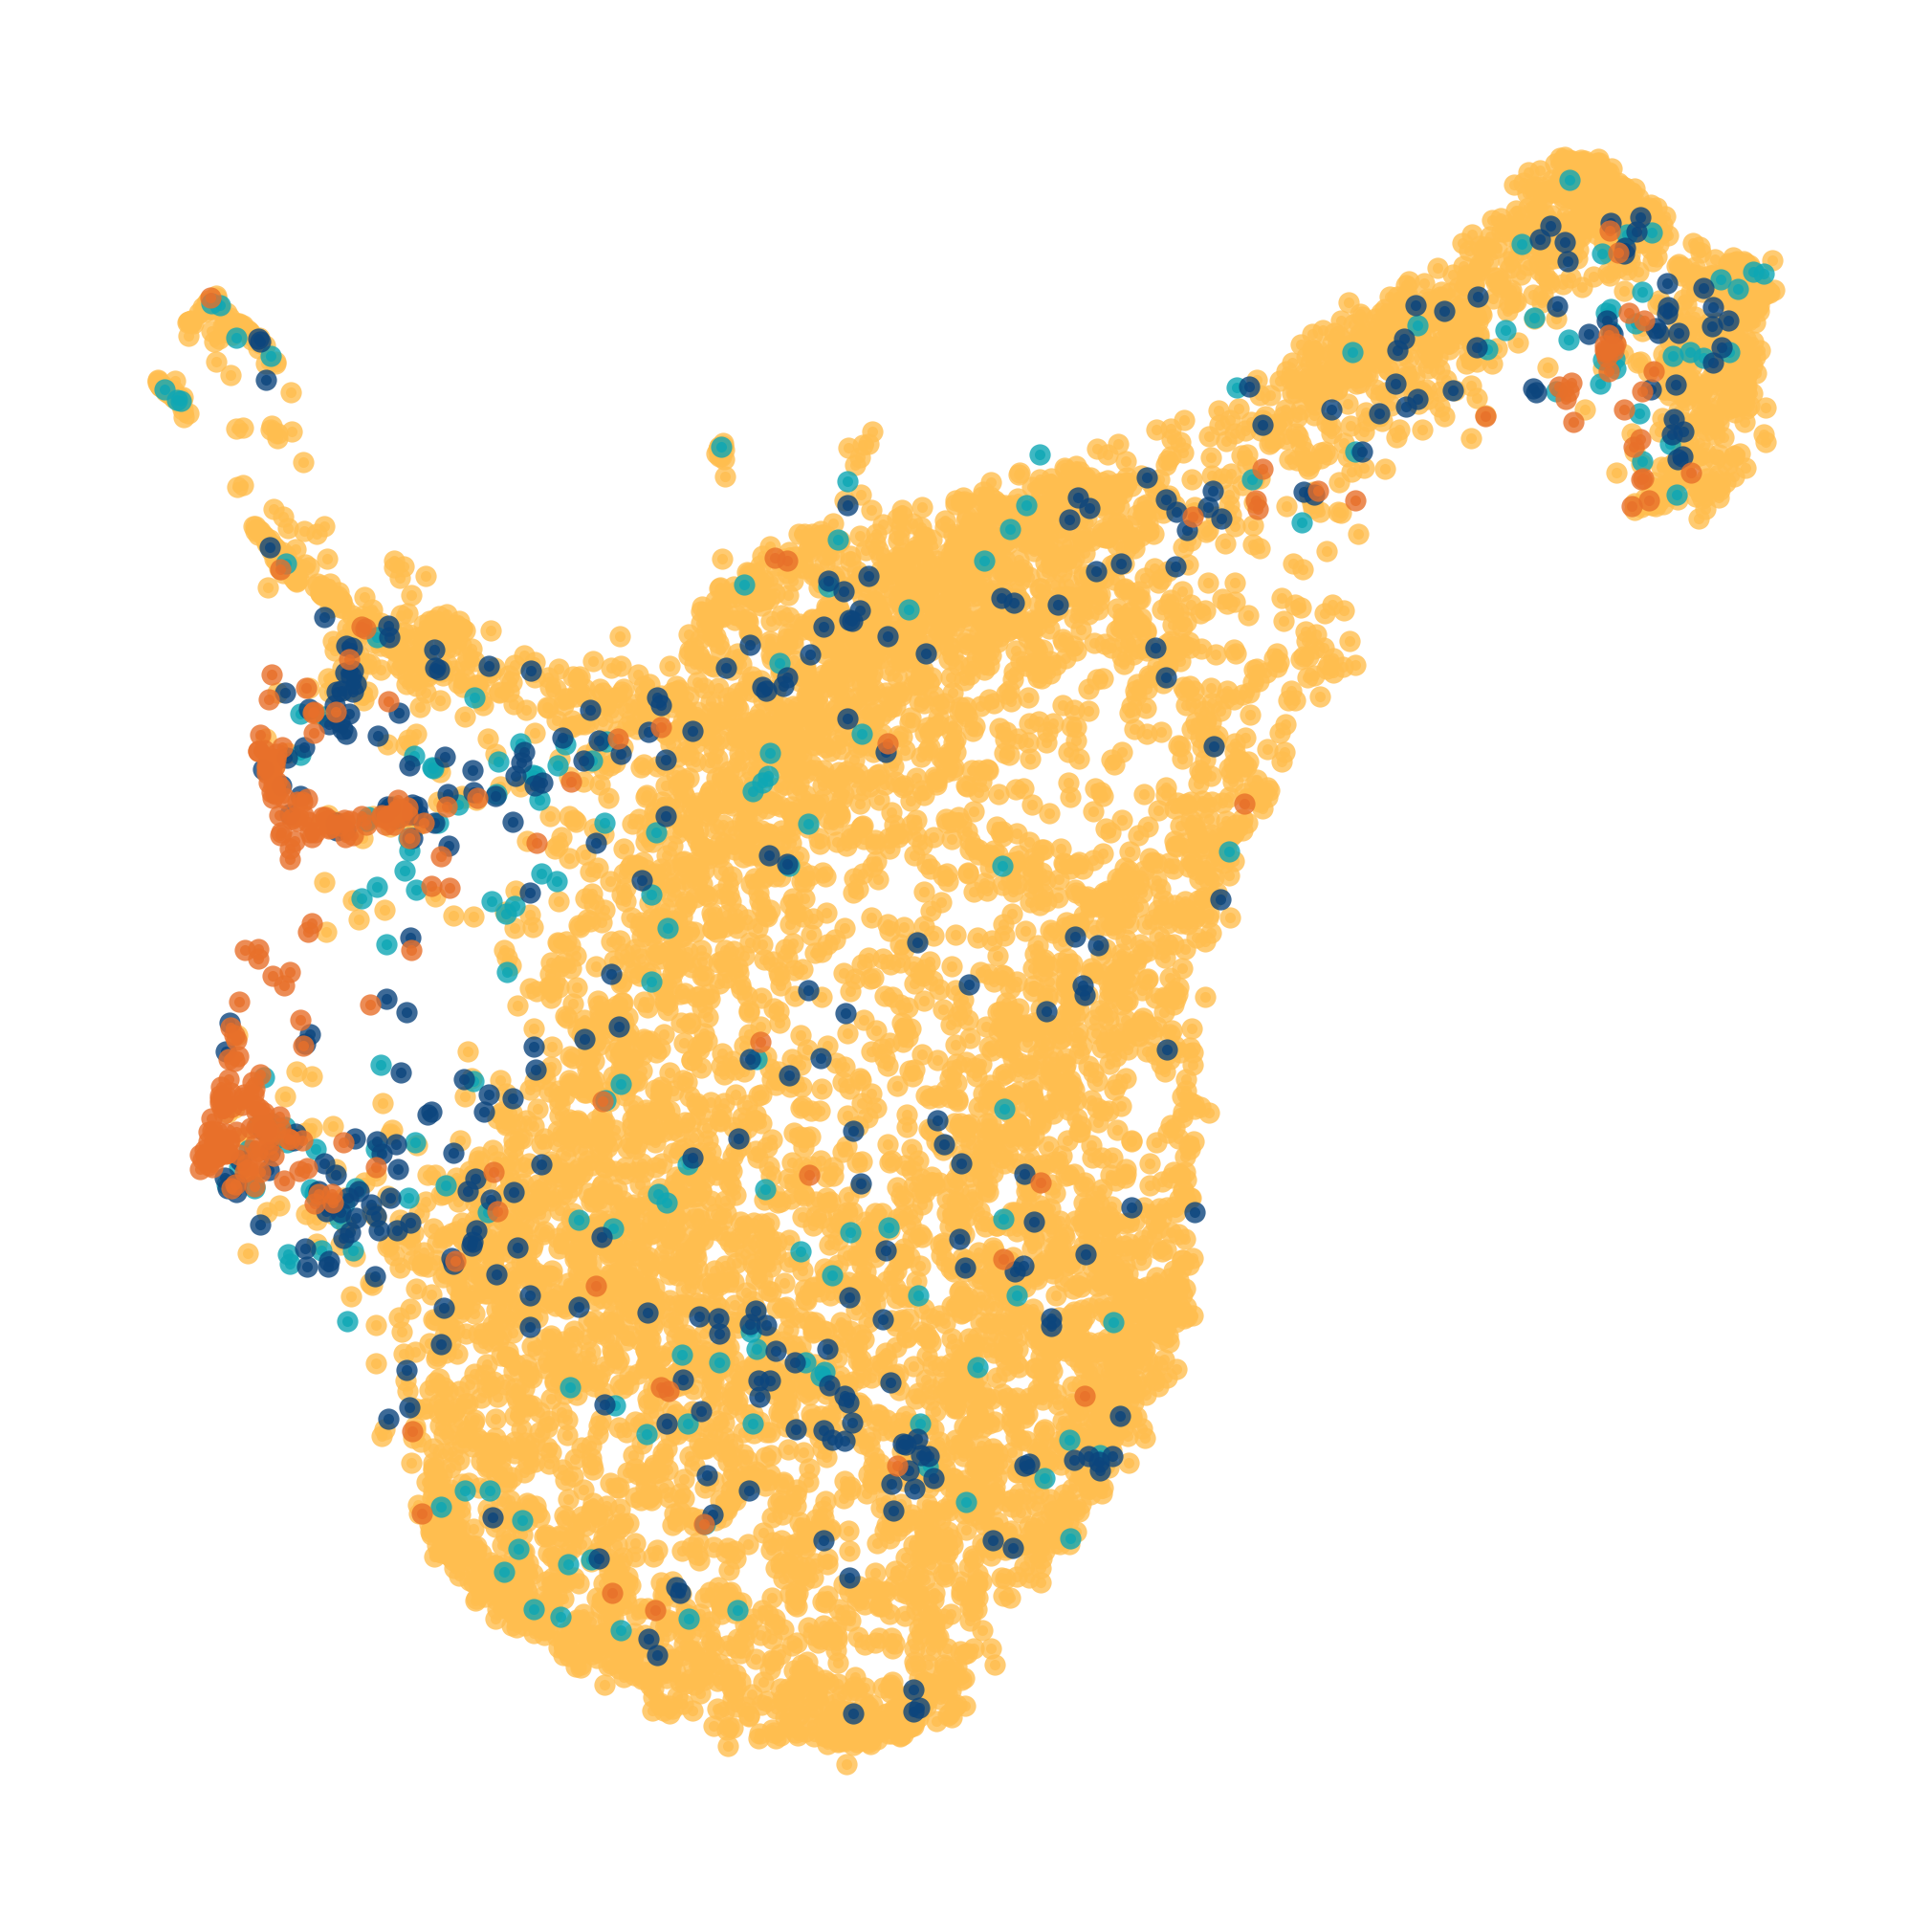

In [122]:
import matplotlib.colors as mcolors
hex_colors = ['#ffbe4f', '#0ea7b5', '#0c457d','#e8702a']
rgb_colors = [mcolors.to_rgb(color) for color in hex_colors]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", rgb_colors)
fig,axs=plt.subplots(1,1,figsize=(3,3),dpi=800)
for i in range(4):
    g=axs.scatter(adata.obsm['X_umap'][adata.obs['condition']==i,0],
                adata.obsm['X_umap'][adata.obs['condition']==i,1],
                #c=adata.obs['condition'],
                #cmap=cmap,
                  c=hex_colors[i],
                s=1,
                alpha=0.8
               )
#plt.colorbar(g)
plt.axis('off')

In [27]:
sc.pp.highly_variable_genes(adata, n_top_genes=200)

In [28]:

for i in ['ALAS2',
          'HBA1',
          'HBA2',
          'HIST1H1C',
          'GYPB',
          'SLC25A37',
          #'DYNLRB1',
          'LGALS1',
          #'TUFM',
          #'PKM'
         ]:
    adata.var.highly_variable[list(adata.var['gene_name']).index(i)]=True
adata = adata[:, adata.var.highly_variable]

In [29]:
adata_ctl = adata[adata.obs['condition'].isin([1,2])].copy()

In [104]:
adata_ctl

AnnData object with n_obs × n_vars = 537 × 203
    obs: 'condition'
    var: 'gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20', 'pca', 'neighbors', 'umap', 'hvg'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [89]:
adata_ctl.write('/hpc/mydata/siyu.he/Siyu_projects/squidward_study/data_for_run/twogenepert/gears_train_data.h5ad')
adata.write('/hpc/mydata/siyu.he/Siyu_projects/squidward_study/data_for_run/twogenepert/gears_test_data.h5ad')

In [90]:
ls '/hpc/mydata/siyu.he/Siyu_projects/squidward_study/data_for_run/twogenepert/'

gears_test_data.h5ad  gears_train_data.h5ad


## load squidiff

In [105]:
font_list = []
fpaths = matplotlib.font_manager.findSystemFonts()
for i in fpaths:
    try:
        f = matplotlib.font_manager.get_font(i)
        font_list.append(f.family_name)
    except RuntimeError:
        pass

font_list = set(font_list)
plot_font = 'Helvetica' if 'Helvetica' in font_list else 'FreeSans'
rcParams['font.family'] = plot_font
rcParams.update({'font.size': 10})
rcParams.update({'figure.dpi': 300})
rcParams.update({'figure.figsize': (3,3)})
rcParams.update({'savefig.dpi': 500})
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

import io
import os
import socket

import torch as th
import torch.distributed as dist
import argparse

from Squidiff import dist_util,logger

from Squidiff.scrna_datasets import load_gene_pert_data,prepared_data
from Squidiff.resample import create_named_schedule_sampler
from Squidiff.script_util import (
    model_and_diffusion_defaults,
    create_model_and_diffusion,
    args_to_dict,
    add_dict_to_argparser,
)

from Squidiff.train_util import TrainLoop

GPUS_PER_NODE = 1  # Set this to the actual number of GPUs per node


def get_default_args():
    defaults = dict(
        data_dir="",
        schedule_sampler="uniform",
        lr=1e-4,
        weight_decay=0.0,
        lr_anneal_steps=0,
        batch_size=64,
        microbatch=-1,  # -1 disables microbatches
        ema_rate="0.9999",  # comma-separated list of EMA values
        log_interval=5000,
        save_interval=10000,
        resume_checkpoint="",
        use_fp16=False,
        fp16_scale_growth=1e-3,
        use_encoder=False
    )
    defaults.update(model_and_diffusion_defaults())
    return defaults



def setup_dist():
    """
    Setup a distributed process group.
    """
    if dist.is_initialized():
        return
    backend = "gloo" if not th.cuda.is_available() else "nccl"
    dist.init_process_group(backend=backend, init_method="env://")


def dev():
    """
    Get the device to use for torch.distributed.
    """
    if th.cuda.is_available():
        return th.device(f"cuda")
    return th.device("cpu")


def load_state_dict(path, **kwargs):
    """
    Load a PyTorch file without redundant fetches across ranks.
    """
    chunk_size = 2 ** 30  # Size limit for data chunks
    if dist.get_rank() == 0:
        with open(path, "rb") as f:
            data = f.read()
        num_chunks = len(data) // chunk_size
        if len(data) % chunk_size:
            num_chunks += 1
        dist.broadcast(th.tensor(num_chunks), 0)
        for i in range(0, len(data), chunk_size):
            dist.broadcast(th.tensor(data[i: i + chunk_size]), 0)
    else:
        num_chunks = dist.broadcast(th.tensor(0), 0).item()
        data = bytes()
        for _ in range(num_chunks):
            chunk = th.zeros(chunk_size, dtype=th.uint8)
            dist.broadcast(chunk, 0)
            data += bytes(chunk.numpy())

    return th.load(io.BytesIO(data), **kwargs)


def sync_params(params):
    """
    Synchronize a sequence of Tensors across ranks from rank 0.
    """
    for p in params:
        with th.no_grad():
            dist.broadcast(p, 0)


def _find_free_port():
    """
    Find a free port for distributed training setup.
    """
    try:
        s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        s.bind(("", 0))
        s.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
        return s.getsockname()[1]
    finally:
        s.close()


def run_training(args):

    logger.configure(dir='/hpc/mydata/siyu.he/squidward_study/logger_file')

    logger.log("creating model and diffusion...")
    model, diffusion = create_model_and_diffusion(
        **args_to_dict(args, model_and_diffusion_defaults().keys())
    )
    model.to(dev())
    schedule_sampler = create_named_schedule_sampler(args['schedule_sampler'], diffusion)

    logger.log("creating data loader...")
    data = prepared_data(
        
        data_dir=args['data_dir'],
        fn = load_gene_pert_data
    )

    logger.log("training...")
    train_ = TrainLoop(
        model=model,
        diffusion=diffusion,
        data=data,
        batch_size=args['batch_size'],
        microbatch=args['microbatch'],
        lr=args['lr'],
        ema_rate=args['ema_rate'],
        log_interval=args['log_interval'],
        save_interval=args['save_interval'],
        resume_checkpoint=args['resume_checkpoint'],
        use_fp16=args['use_fp16'],
        fp16_scale_growth=args['fp16_scale_growth'],
        schedule_sampler=schedule_sampler,
        weight_decay=args['weight_decay'],
        lr_anneal_steps=args['lr_anneal_steps'],
    )
    train_.run_loop()
    return train_.loss_list


args = get_default_args()
args.update({
    'data_dir': '/hpc/mydata/siyu.he/Siyu_projects/squidward_study/data_for_run/twogenepert/',
    'schedule_sampler': 'uniform',
    'lr': 1e-4,
    'weight_decay': 0.0,
    'lr_anneal_steps': 5e5,
    'batch_size': 128,
    'microbatch': -1,
    'ema_rate': '0.9999',
    'log_interval': 5000,
    'save_interval': 1e4,#1e4,
    'resume_checkpoint': '',
    'use_fp16': False,
    'fp16_scale_growth': 1e-3,
    'gene_size': 203, 
    'output_dim':203,
    'num_layers':3,
    'class_cond': False,  
    'use_encoder': True,
})




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
losses = run_training(args)

Logging to /hpc/mydata/siyu.he/squidward_study/logger_file
creating model and diffusion...
steps 1000
creating data loader...
training...
-------------------------
| grad_norm  | 1.76     |
| loss       | 1.13     |
| loss_q0    | 1.17     |
| loss_q1    | 1.11     |
| loss_q2    | 1.15     |
| loss_q3    | 1.07     |
| mse        | 1.13     |
| mse_q0     | 1.17     |
| mse_q1     | 1.11     |
| mse_q2     | 1.15     |
| mse_q3     | 1.07     |
| param_norm | 172      |
| samples    | 128      |
| step       | 0        |
-------------------------
saving model 0...
saving model 0.9999...
-------------------------
| grad_norm  | 0.61     |
| loss       | 0.104    |
| loss_q0    | 0.189    |
| loss_q1    | 0.0778   |
| loss_q2    | 0.0745   |
| loss_q3    | 0.0763   |
| mse        | 0.104    |
| mse_q0     | 0.189    |
| mse_q1     | 0.0778   |
| mse_q2     | 0.0745   |
| mse_q3     | 0.0763   |
| param_norm | 172      |
| samples    | 6.4e+05  |
| step       | 5e+03    |
---------------

KeyboardInterrupt: 

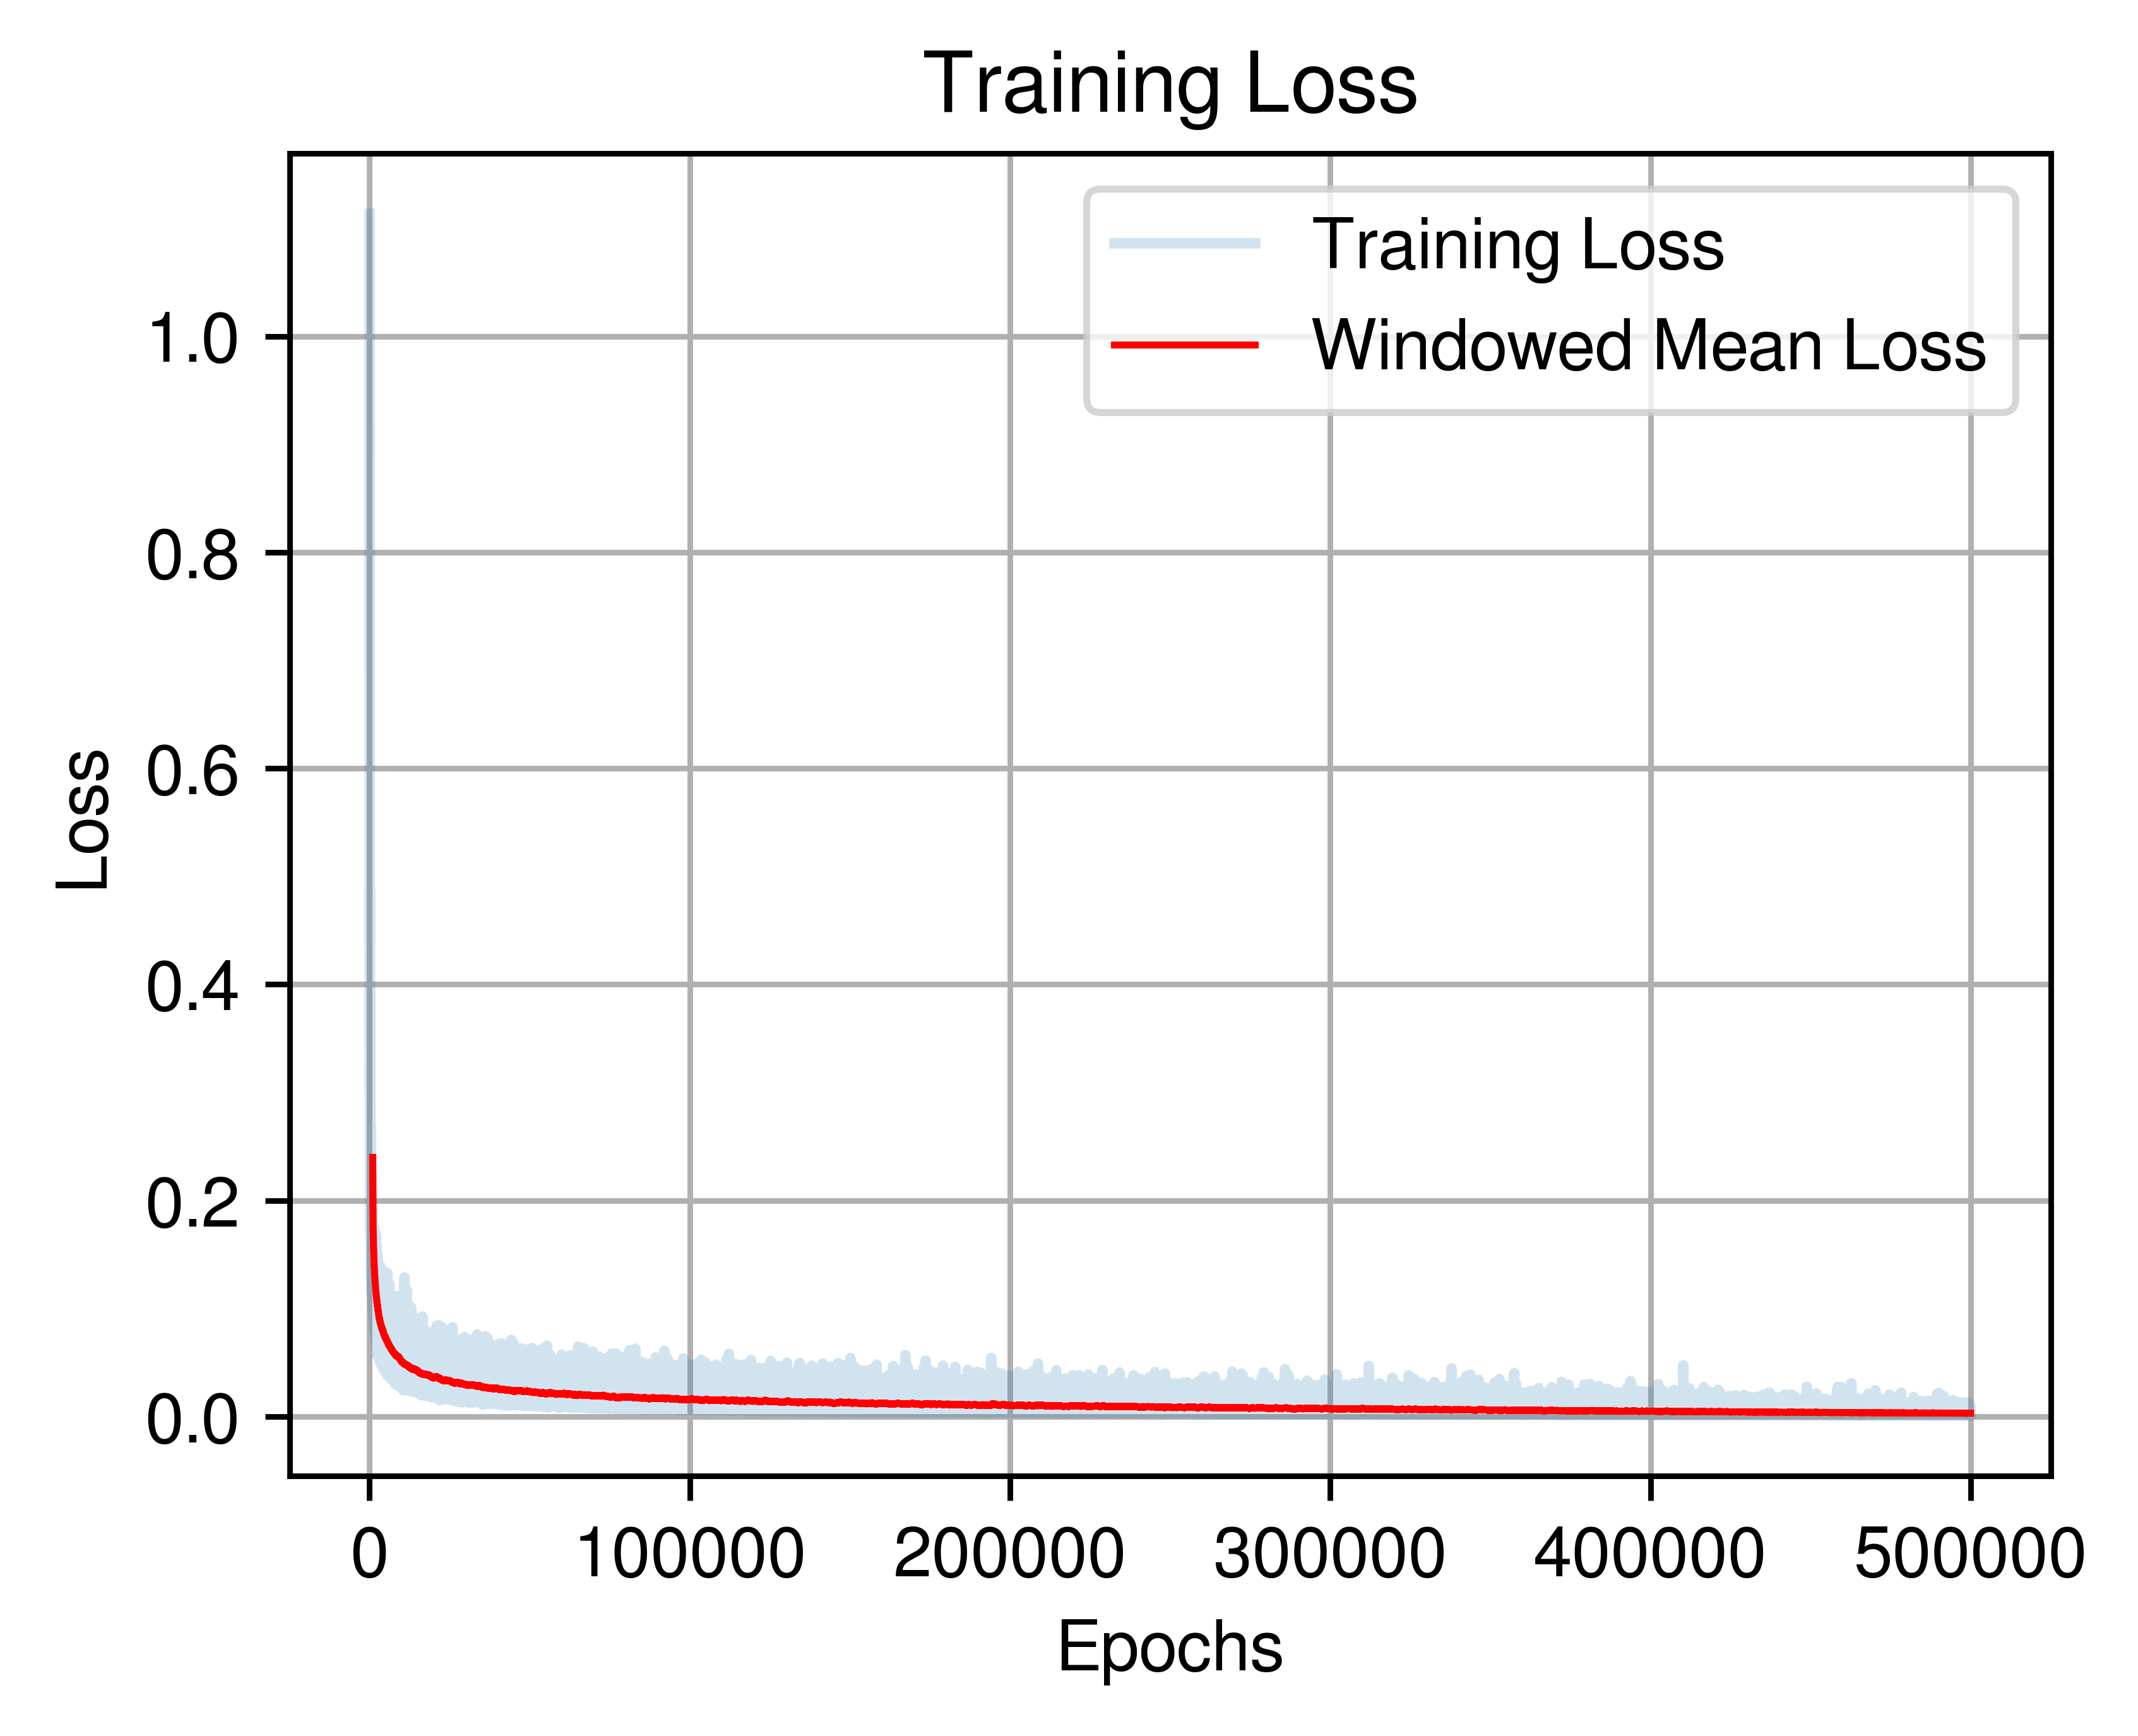

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Convert losses to a numpy array
losses_np = np.array([i.detach().cpu().numpy() for i in losses])

# Define the window size for the moving average
window_size = 1000  # You can adjust this value based on your preference

# Calculate the moving average (mean of the windowed losses)
windowed_mean_loss = np.convolve(losses_np, np.ones(window_size) / window_size, mode='valid')

# Adjust the x-axis values for the windowed mean loss
x_vals = np.linspace(0, 500000, len(losses_np))
windowed_x_vals = x_vals[window_size - 1:]  # Adjust to match the length of the windowed_mean_loss

# Plotting
plt.figure(figsize=(4.5, 3.4), dpi=800)
plt.plot(x_vals, losses_np, label='Training Loss', alpha=0.2)
plt.plot(windowed_x_vals, windowed_mean_loss, label='Windowed Mean Loss', color='r', linewidth=1)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.show()


## z_sem and xT on train data

In [107]:
import argparse
import os

import numpy as np
import torch as th
import torch.distributed as dist

from Squidiff import dist_util, logger
from Squidiff.script_util import (
    NUM_CLASSES,
    model_and_diffusion_defaults,
    create_model_and_diffusion,
    add_dict_to_argparser,
    args_to_dict,
)


def create_argparser():
    defaults = dict(
        clip_denoised=False,
        num_samples=2400,
        batch_size=16,
        use_ddim=False,
        model_path="model.pt",
    )
    defaults.update(model_and_diffusion_defaults())

    return defaults


In [109]:

args = create_argparser()
args.update({
    'data_dir': '/hpc/mydata/siyu.he/Siyu_projects/squidward_study/data_for_run/twogenepert/',
    'schedule_sampler': 'uniform',
    'lr': 1e-4,
    'weight_decay': 0.0,
    'lr_anneal_steps': 2400,
    'batch_size': 16,
    'microbatch': -1,
    'ema_rate': '0.9999',
    'log_interval': 50,
    'save_interval': 1000,
    'resume_checkpoint': '',
    'use_fp16': False,
    'fp16_scale_growth': 1e-3,
    'gene_size': 203, 
    'output_dim':203,
    'num_layers':3,
    'class_cond': False,  
    'use_ddim':True,
    'use_encoder':True,
    
})
#dist_util.setup_dist()

logger.configure(dir='logger_file')
logger.log("creating model and diffusion...")

model, diffusion = create_model_and_diffusion(
        **args_to_dict(args, model_and_diffusion_defaults().keys())
    )

model.load_state_dict(
    dist_util.load_state_dict(args['model_path'])
)
model.to(dist_util.dev())
if args['use_fp16']:
    model.convert_to_fp16()
model.eval()


Logging to logger_file
creating model and diffusion...
steps 1000


MLPModel(
  (encoder): EncoderMLPModel(
    (fc1): Linear(in_features=203, out_features=2048, bias=True)
    (bn1): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc2): Linear(in_features=2048, out_features=2048, bias=True)
    (fc3): Linear(in_features=2048, out_features=60, bias=True)
    (label_embed): Linear(in_features=1, out_features=2048, bias=True)
  )
  (time_embed): Sequential(
    (0): Linear(in_features=2048, out_features=2048, bias=True)
    (1): SiLU()
    (2): Linear(in_features=2048, out_features=2048, bias=True)
  )
  (mlp_blocks): TimestepEmbedSequential(
    (0): MLPBlock(
      (fc1): Linear(in_features=2048, out_features=2048, bias=True)
      (fc2): Linear(in_features=2048, out_features=2048, bias=True)
      (layer_norm1): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
      (layer_norm2): LayerNorm((2048,), eps=1e-05, eleme

In [259]:
from Squidiff.scrna_datasets import load_gene_pert_data,prepared_data
import torch
data = load_gene_pert_data(data_dir=args['data_dir'])

In [111]:
data[2].obs.condition

cell_barcode
AAACCTGCACGAAGCA-1    0
AAACCTGGTATAATGG-1    0
AAACCTGTCCGATATG-1    0
AAACGGGCAATGGACG-1    0
AAAGATGAGATGAGAG-1    0
                     ..
TTTGCGCAGGCAGGTT-8    0
TTTGGTTGTTAAGATG-8    0
TTTGGTTTCCTGCCAT-8    0
TTTGTCAGTAGCGTGA-8    0
TTTGTCAGTCAGAATA-8    0
Name: condition, Length: 8147, dtype: category
Categories (4, int64): [0, 1, 3, 2]

In [112]:
def stochastic_encode(
    model, x, t, model_kwargs):
    """
    ddim reverse sample
    """
    sample = x
    sample_t = []
    xstart_t = []
    T = []
    indices = list(range(t))

    for i in indices:
        timestep = torch.full((x.shape[0],), i, device='cuda').long()
        with torch.no_grad():
            out = diffusion.ddim_reverse_sample(model, 
                                                sample, 
                                                timestep, 
                                                model_kwargs=model_kwargs)
            sample = out['sample']
            sample_t.append(sample)
            xstart_t.append(out['pred_xstart'])
            T.append(timestep)

    return {
    'sample': sample,
    'sample_t': sample_t,
    'xstart_t': xstart_t,
    'T': T,
}


In [113]:
from scipy.stats import gaussian_kde
def display_reconst(df_true,
                    df_pred,
                    density=False,
                    den_all = False,
                    marker_genes=None,
                    sample_rate=0.1,
                    size=(4, 4),
                    spot_size=1,
                    title=None,
                    x_label='',
                    y_label='',
                    ):
    """
    Scatter plot - raw gexp vs. reconstructed gexp
    """
    assert 0 < sample_rate <= 1, \
        "Invalid downsampling rate for reconstruct scatter plot: {}".format(sample_rate)

    if marker_genes is not None:
        marker_genes = set(marker_genes)

    df_true_sample = df_true.sample(frac=sample_rate, random_state=0)
    df_pred_sample = df_pred.loc[df_true_sample.index]

    plt.rcParams["figure.figsize"] = size
    plt.figure(dpi=800)
    ax = plt.gca()

    xx = df_true_sample.T.to_numpy().flatten()
    yy = df_pred_sample.T.to_numpy().flatten()

    if density and not den_all:
        for gene in df_true_sample.columns:
            try:
                gene_true = df_true_sample[gene].values
                gene_pred = df_pred_sample[gene].values
                gexp_stacked = np.vstack([df_true_sample[gene].values, df_pred_sample[gene].values])

                z = gaussian_kde(gexp_stacked)(gexp_stacked)
                ax.scatter(gene_true, gene_pred, c=z,vmin=0,cmap='Spectral_r',
                           s=spot_size, alpha=0.5)
            except np.linalg.LinAlgError as e:
                pass

    elif marker_genes is not None:
        color_dict = {True: 'red', False: 'green'}
        gene_colors = np.vectorize(
            lambda x: color_dict[x in marker_genes]
        )(df_true_sample.columns)
        colors = np.repeat(gene_colors, df_true_sample.shape[0])

        ax.scatter(xx, yy, c=colors, s=spot_size, alpha=0.5)

    elif density and den_all:
        gene_true = df_true_sample.values.flatten()
        gene_pred = df_pred_sample.values.flatten()
        gexp_stacked = np.vstack([df_true_sample.values.flatten(), df_pred_sample.values.flatten()])
        z = gaussian_kde(gexp_stacked)(gexp_stacked)
        ax.scatter(gene_true, gene_pred, c=z,vmin=0,cmap='Spectral_r',
                           s=spot_size, alpha=0.5)
    else:
        ax.scatter(xx, yy, s=spot_size, alpha=0.5)
    
    
        
    min_val = min(xx.min(), yy.min())
    max_val = max(xx.max(), yy.max())
    #ax.set_xlim(min_val, 400)
    
    #ax.set_ylim(min_val, 400)
    ax.set_aspect('equal',adjustable='box')
    ax.axis('equal')
    ax.set_xlim(0, max_val)
    ax.set_ylim(min_val-0.2, max_val)
    plt.suptitle(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show()

In [114]:
data[2]

AnnData object with n_obs × n_vars = 8147 × 203
    obs: 'condition'
    var: 'gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'neighbors', 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'pca', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [115]:
torch.tensor(data[2].X.toarray()).shape

torch.Size([8147, 203])

In [116]:
z_sem = model.encoder(torch.tensor(data[2].X.toarray()).to('cuda'),
                      #label = torch.tensor(data[2].obs.values, dtype = torch.float32).to('cuda'),
                     )

model_kwargs = {'x_start':torch.tensor(data[2].X.toarray(), dtype = torch.float32).to('cuda'),
                'z_mod':z_sem,
                #'cond':torch.tensor(data[2].obs.values, dtype = torch.float32).to('cuda'),
               }

x_T = stochastic_encode(model,
                  x = torch.tensor(data[2].X.toarray(), dtype = torch.float32).to('cuda'),
                  t = 999,
                  model_kwargs=model_kwargs
                 )['sample']
label = data[2].obs.values[:,0]

In [40]:
import umap
def plot_embed(x_,n_neighbors=50, min_dist=0.01, n_components=2, random_state=42):

    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, random_state=random_state)
    embedding = reducer.fit_transform(x_.detach().cpu())
    plt.figure(figsize=(3,3), dpi=800)
    colorlist = ['#facc4d', '#e8702a']  # Colors for day 0 and day 3
    plt.scatter(embedding[label==1, 0], 
                embedding[label==1, 1], 
                c=colorlist[0],
                s=5,
                alpha=1)
    
    plt.scatter(embedding[label==2, 0], 
                embedding[label==2, 1], 
                c=colorlist[1],
                s=5,
                alpha=1)
    plt.axis('off')
    plt.show()

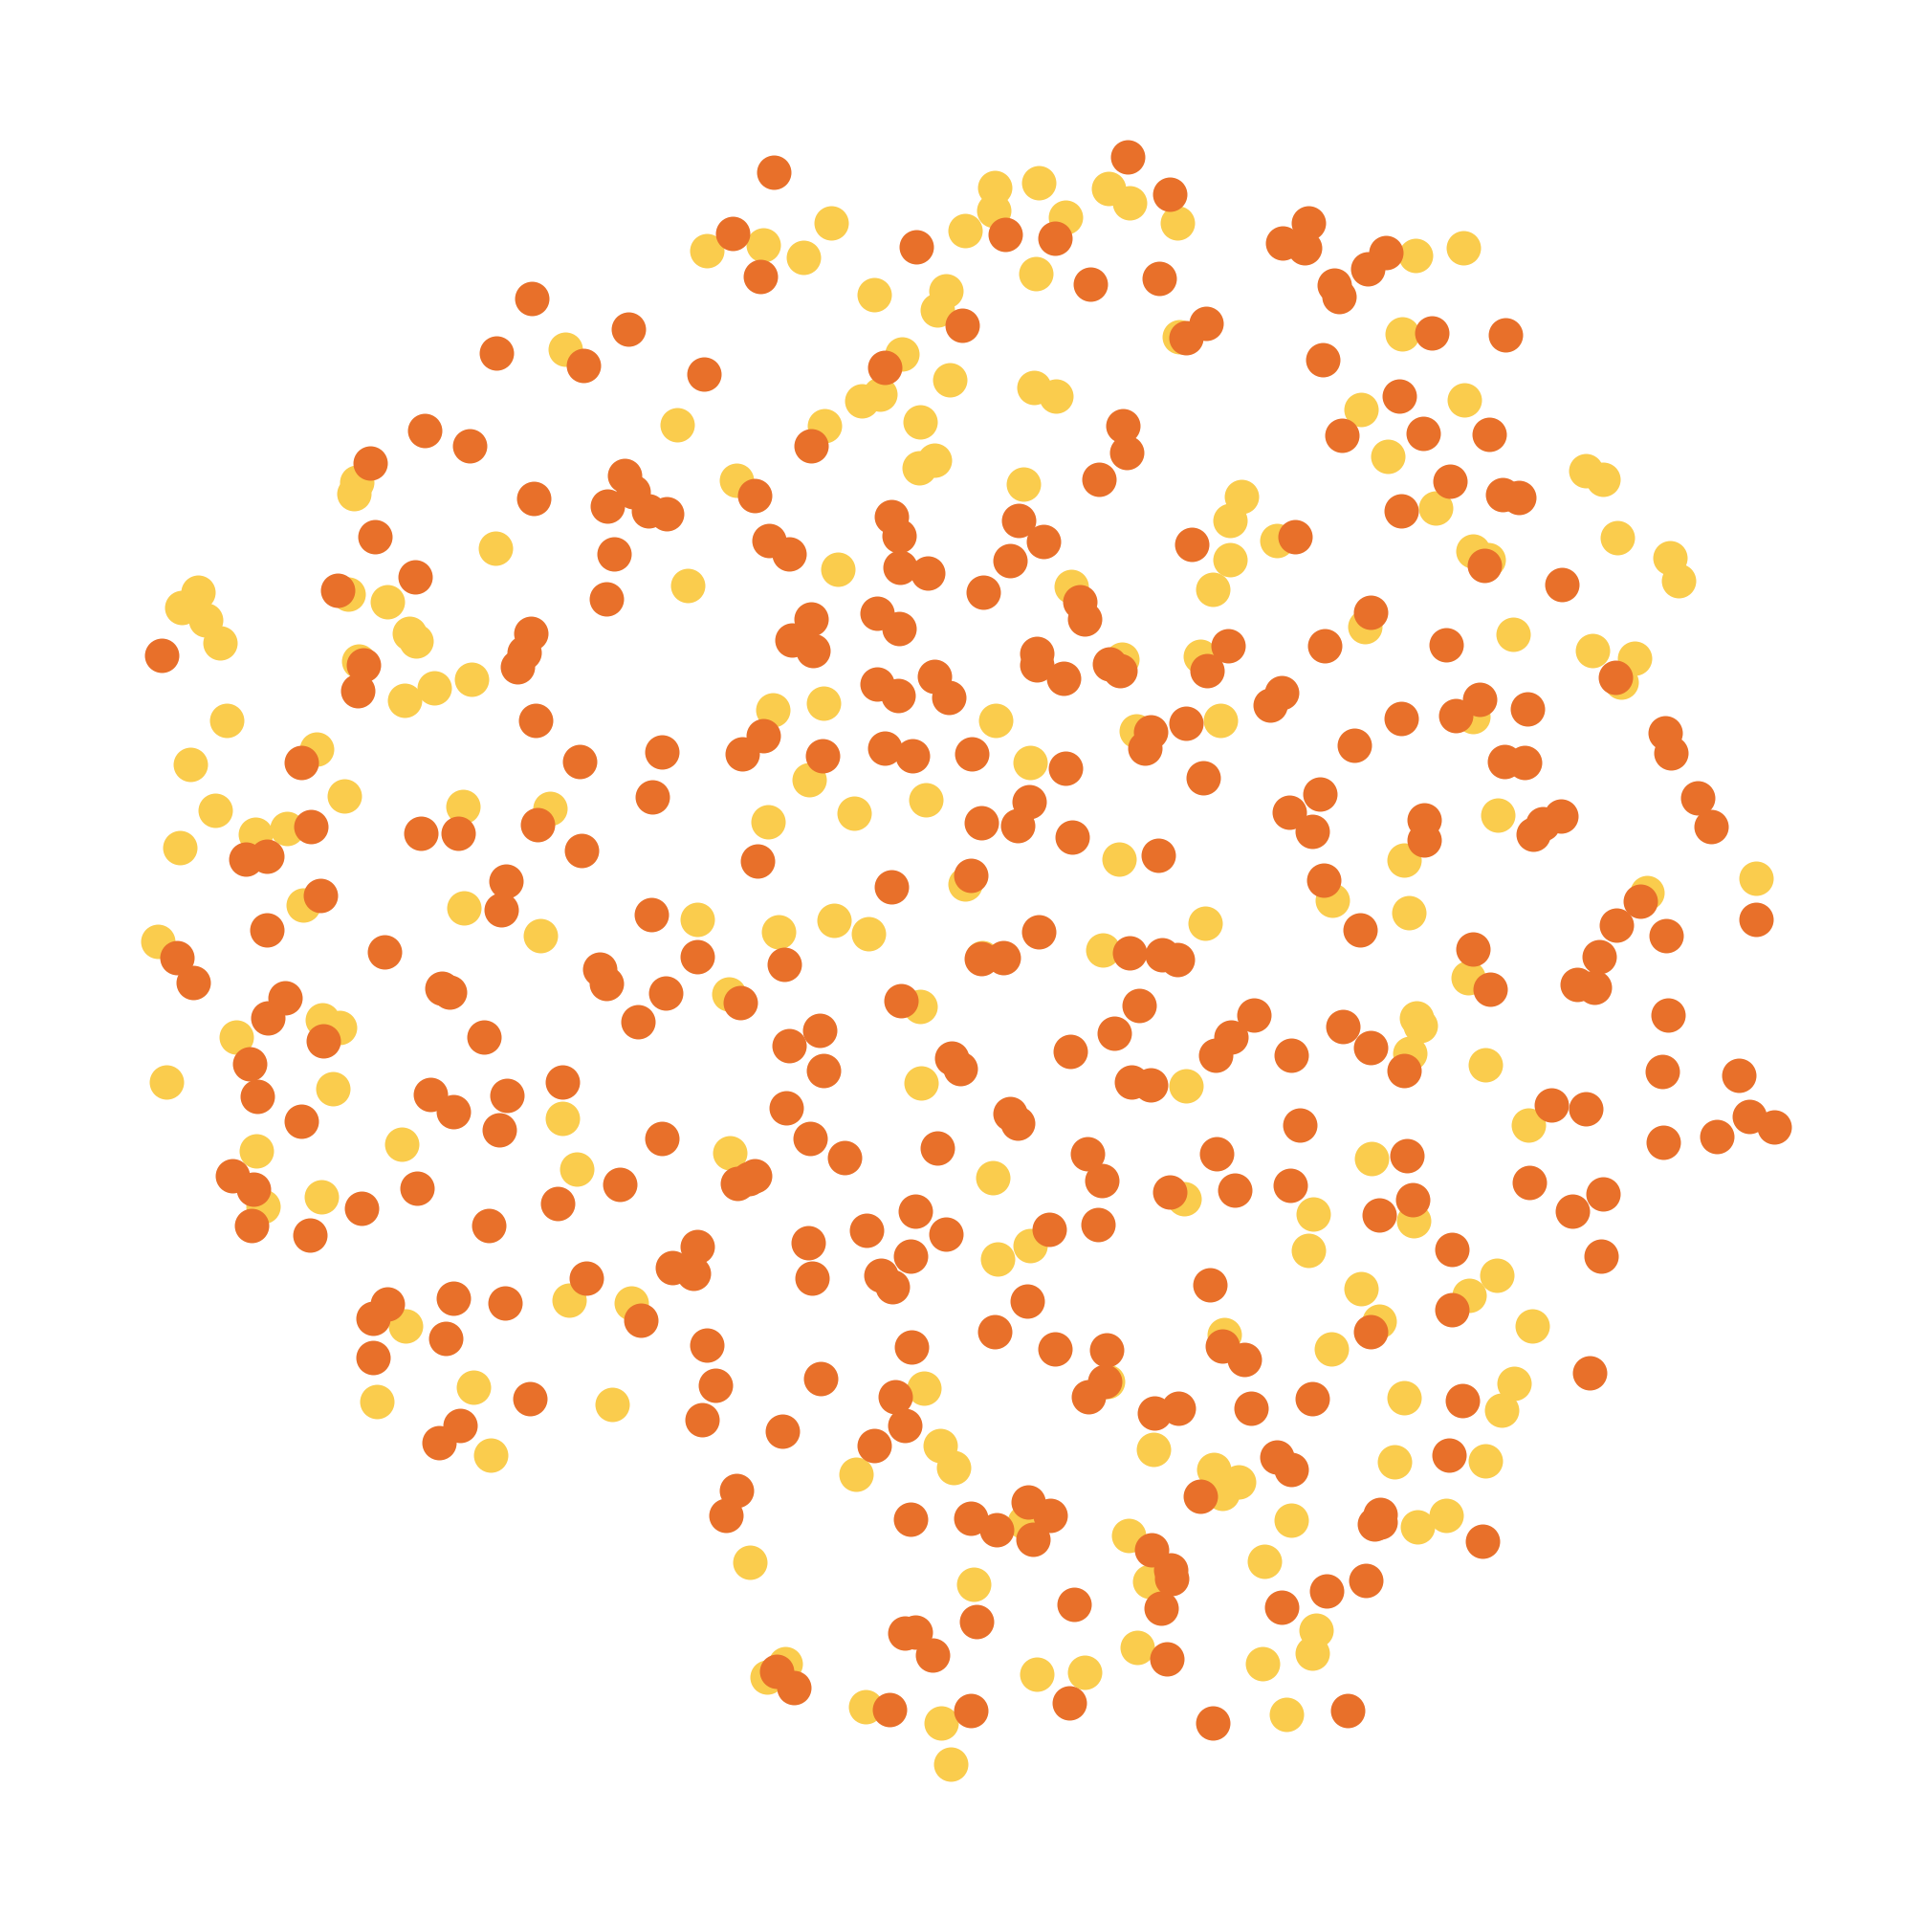

In [41]:
plot_embed(z_sem)

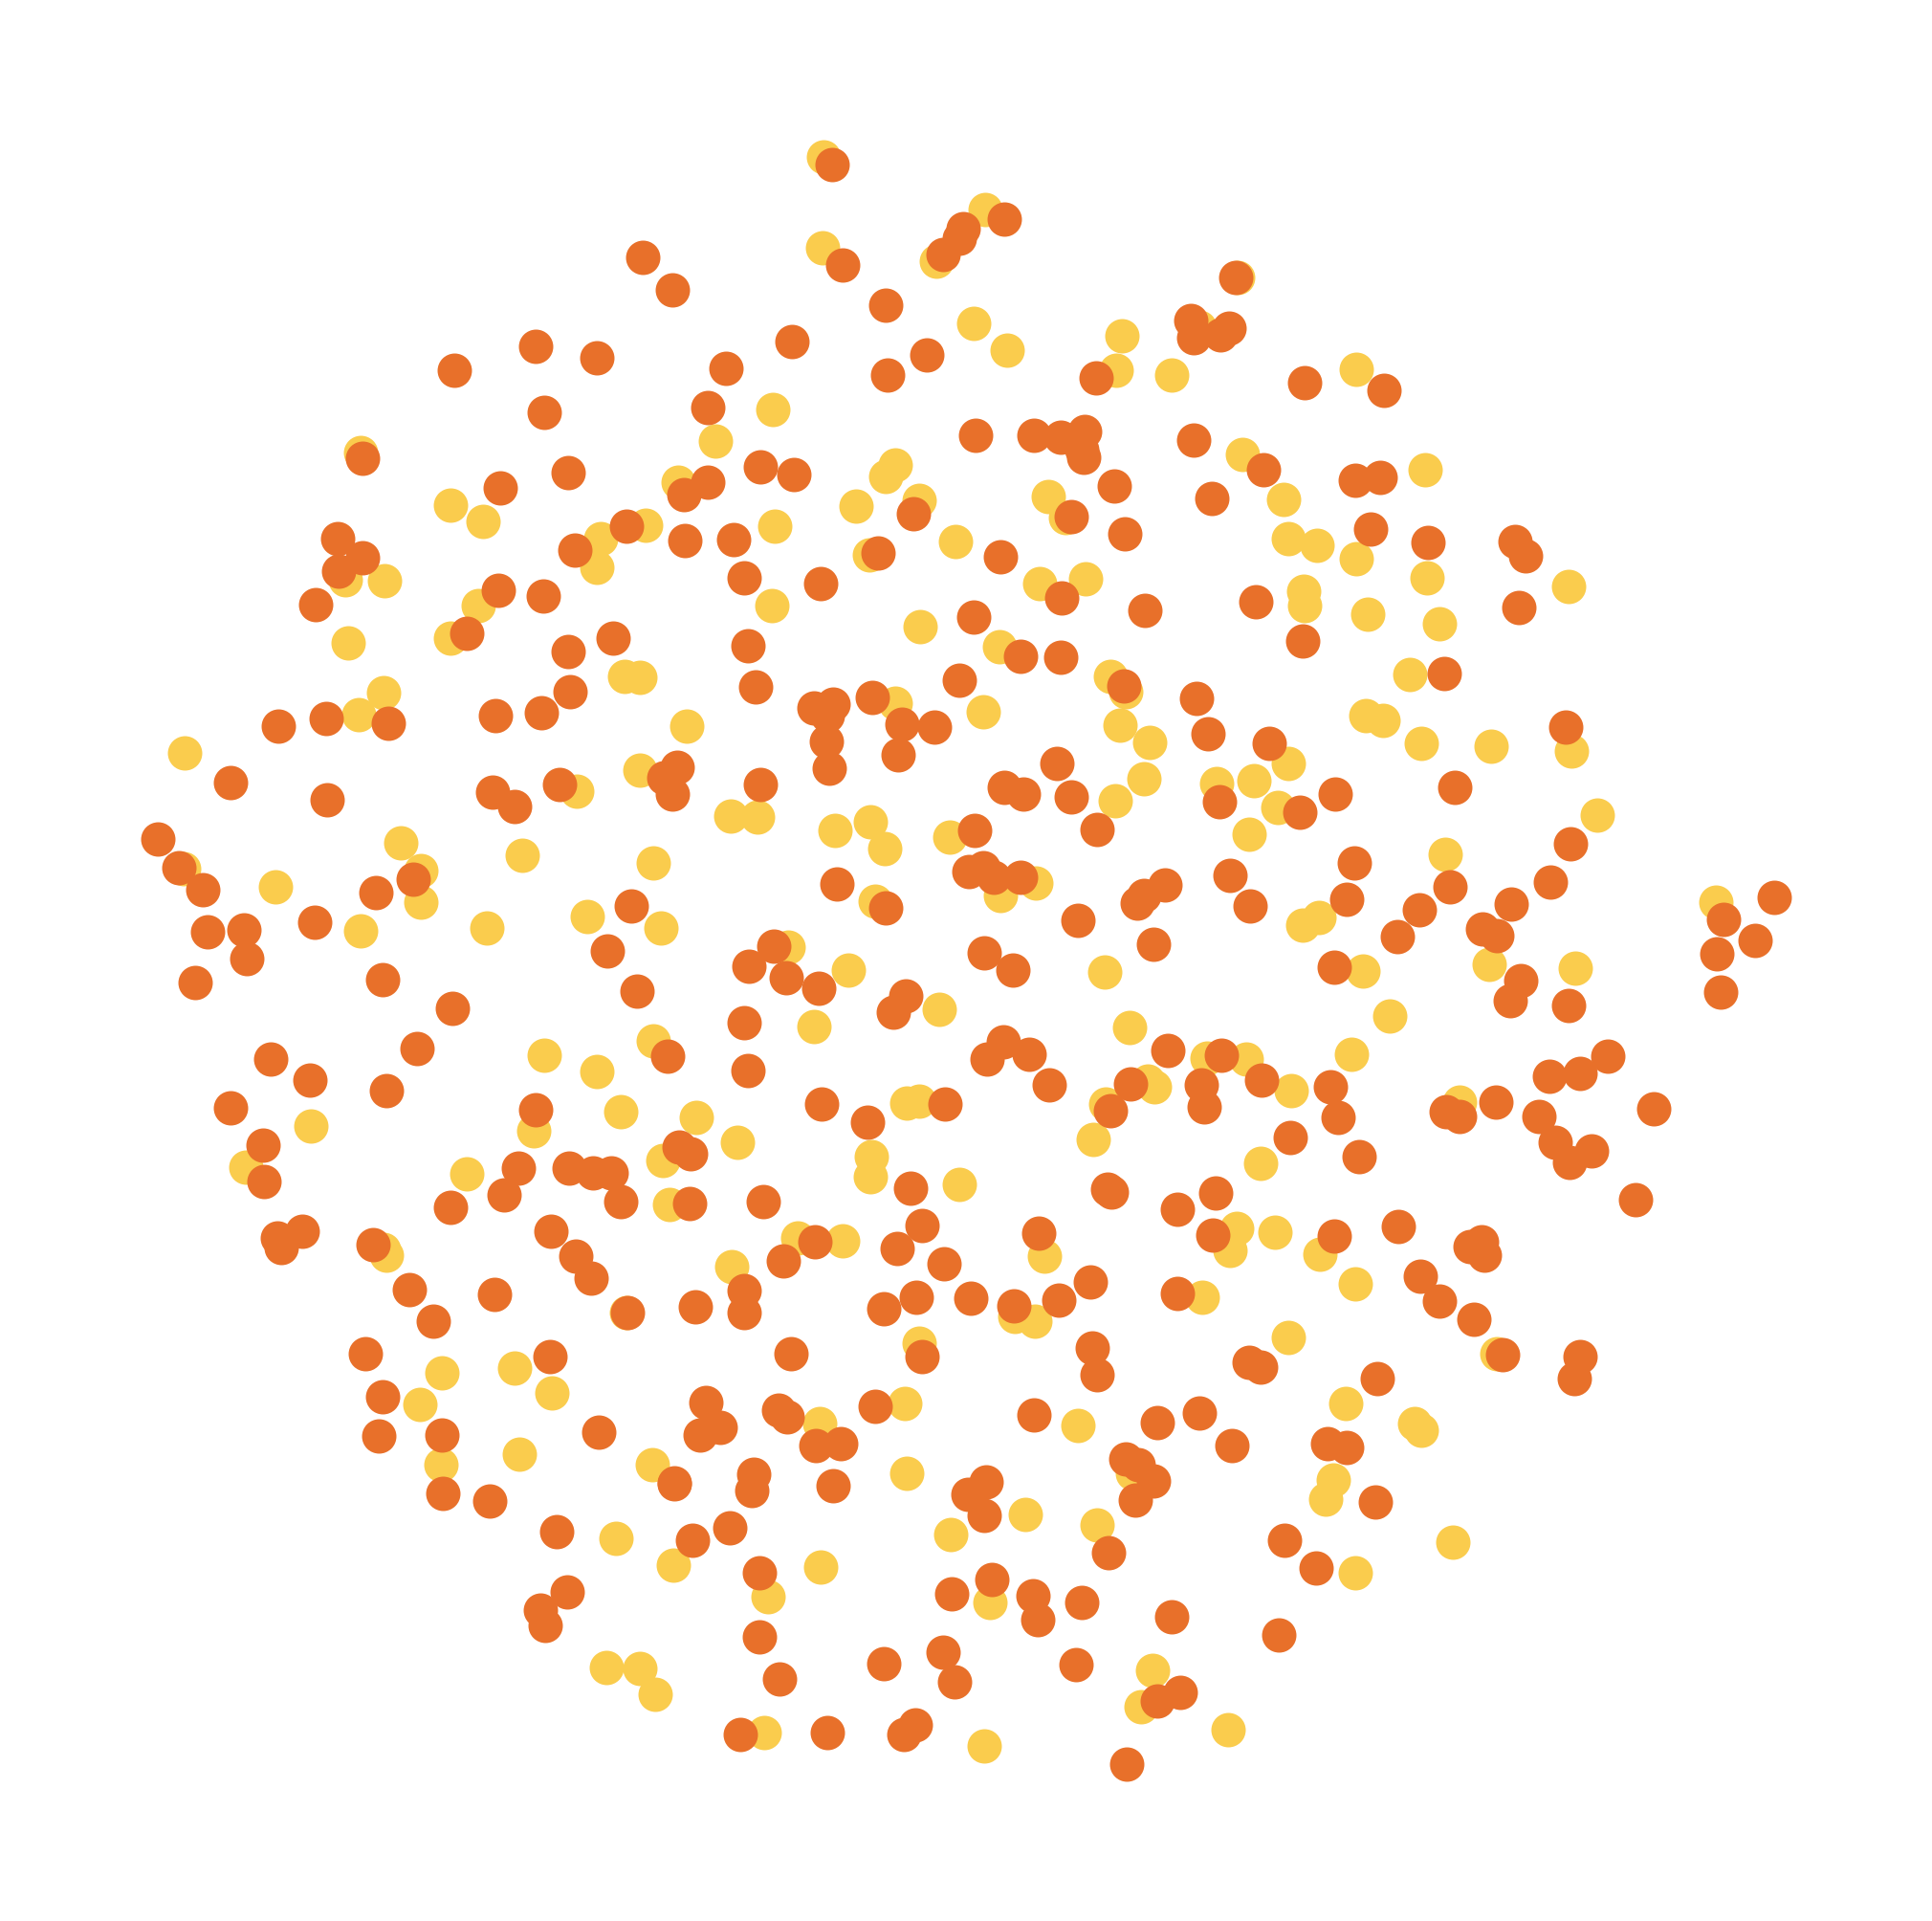

In [42]:
plot_embed(x_T)

In [43]:
data[0]

AnnData object with n_obs × n_vars = 537 × 201
    obs: 'condition'
    var: 'gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'neighbors', 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'pca', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [44]:
logger.log("sampling...")
sample_fn = (diffusion.p_sample_loop if not args['use_ddim'] else diffusion.ddim_sample_loop)


sample_interp0 = sample_fn(
                    model,
                    shape = (537, args['gene_size']),
                    clip_denoised=args['clip_denoised'],
                    model_kwargs={
                        'z_mod': z_sem},
                    noise =  None, #x_T
)

sampling...


In [67]:
#pd.DataFrame(original_array).to_csv('original_data.csv')

In [68]:
#pd.DataFrame(reconstructed_data_array).to_csv('reconstructed_data_array.csv')

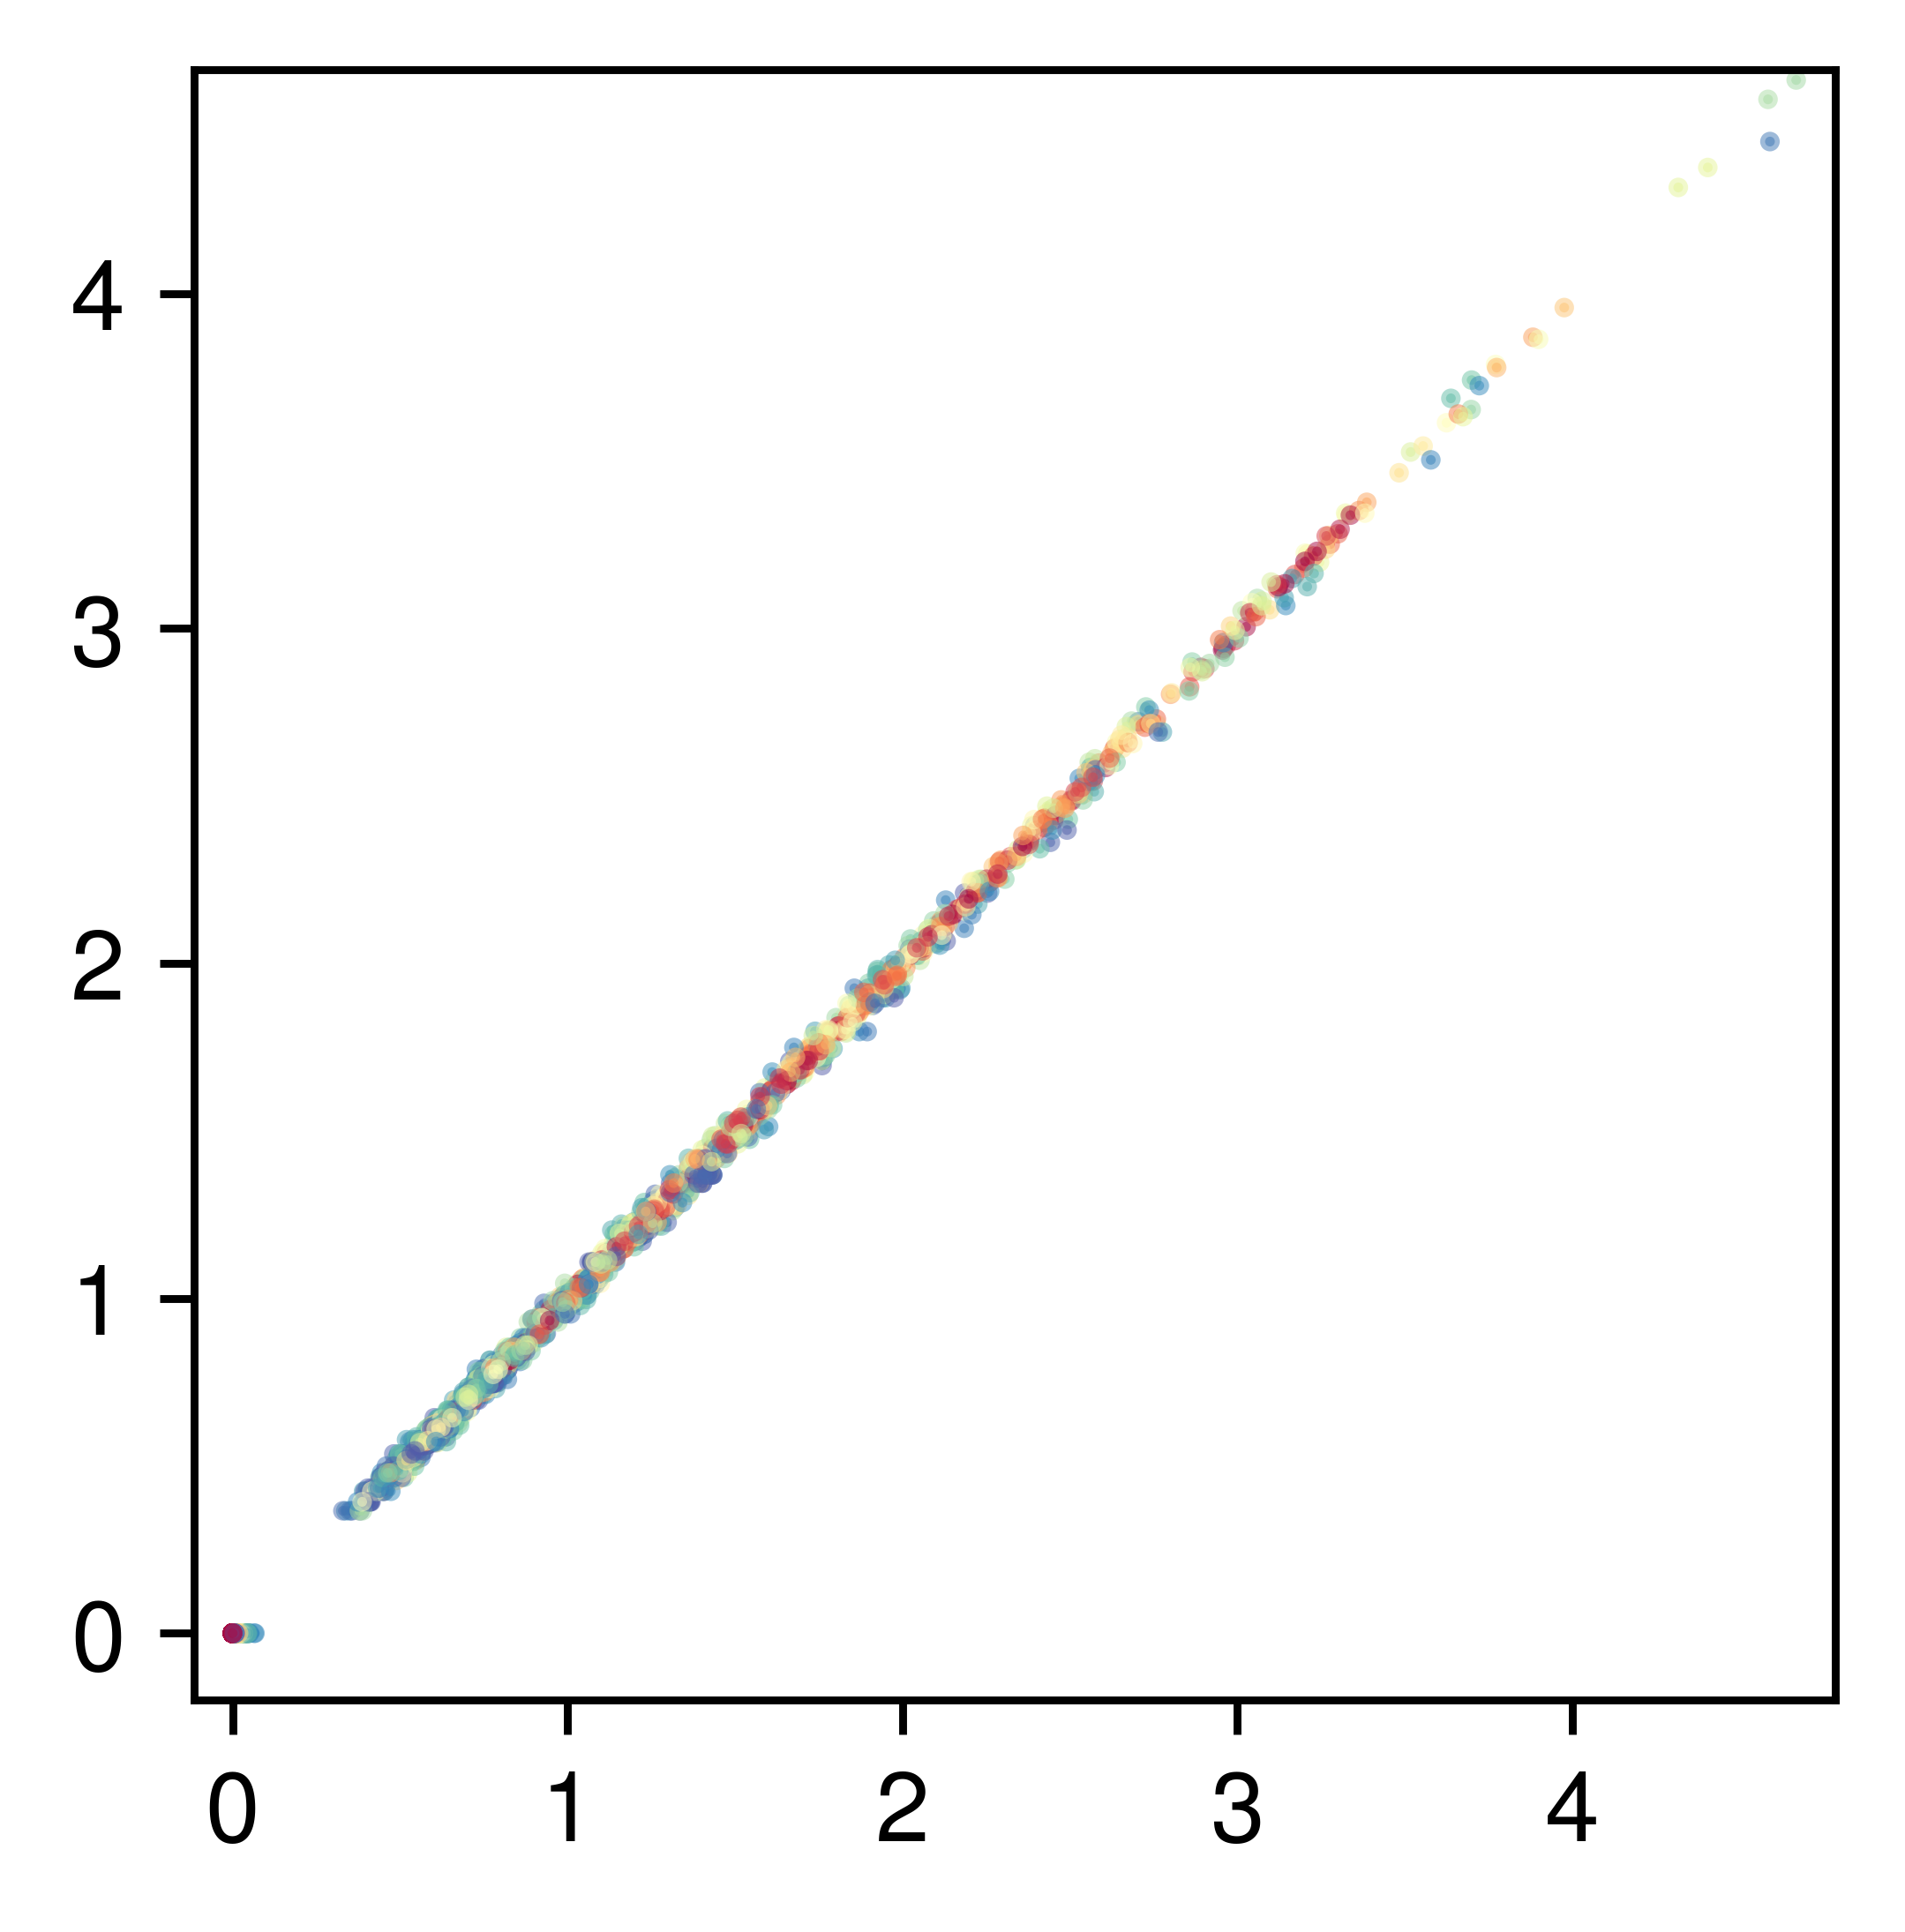

In [72]:
display_reconst(pd.DataFrame(sample_interp0.detach().cpu() ), 
                pd.DataFrame(data[0].X.toarray()),
                density=True,
                size=(3,3),
                #den_all=True,
               )

In [49]:
import scipy
from sklearn.metrics import r2_score
p_ , _ = scipy.stats.pearsonr(
        (data[0].X.toarray().flatten()),
        (sample_interp0.detach().cpu().flatten())
                    )

r_= r2_score(
        data[0].X.toarray().mean(axis=0),
        sample_interp0.detach().cpu().numpy().mean(axis=0)
                    )

In [50]:
p_, r_

(0.9997861467010342, 0.9999640583992004)

In [51]:
import numpy as np
import torch

def gaussian_kernel_matrix(x, y, sigma=1):
    """Compute the Gaussian (RBF) kernel matrix between x and y."""
    dists = torch.cdist(x, y, p=2)
    K = torch.exp(- dists ** 2 / (2 * sigma ** 2))
    return K

def compute_mmd(X, Y, sigma=1.0):
    """Compute the Maximum Mean Discrepancy (MMD) between two samples X and Y."""
    X = torch.tensor(X, dtype=torch.float32)
    Y = torch.tensor(Y, dtype=torch.float32)

    # Ensure the input tensors are 2D
    if len(X.shape) == 1:
        X = X.unsqueeze(1)
    if len(Y.shape) == 1:
        Y = Y.unsqueeze(1)

    # Compute the kernel matrices
    K_xx = gaussian_kernel_matrix(X, X, sigma)
    K_yy = gaussian_kernel_matrix(Y, Y, sigma)
    K_xy = gaussian_kernel_matrix(X, Y, sigma)

    # Calculate the MMD score
    m = X.size(0)
    n = Y.size(0)

    mmd_score = (K_xx.sum() - K_xx.trace()) / (m * (m - 1)) + \
                (K_yy.sum() - K_yy.trace()) / (n * (n - 1)) - \
                2 * K_xy.mean()

    # Ensure non-negative MMD score
    mmd_score = max(0, mmd_score.item())
    
    return mmd_score

X = data[0].X.toarray().mean(axis=0)
Y = sample_interp0.detach().cpu().numpy().mean(axis=0)

# Reshape X and Y to 2D arrays where each row is a sample
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

mmd_score = compute_mmd(X, Y)
print(f"MMD score: {mmd_score}")


MMD score: 0


## perturbation test

In [117]:
label = data[2].obs['condition'].values

In [118]:
label

[0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 8147
Categories (4, int64): [0, 1, 3, 2]

In [119]:
z_sem_0 = z_sem[label ==0].mean(axis=0)

In [120]:
z_sem_1 = z_sem[label ==1].mean(axis=0)
z_sem_2 = z_sem[label ==2].mean(axis=0)

In [121]:
xT_1 = x_T[label ==1].mean(axis=0)
xT_2 = x_T[label ==2].mean(axis=0)
xT_0 = x_T[label ==0].mean(axis=0)

In [122]:
(z_sem[label ==0].shape[0], args['gene_size'])

(7353, 203)

In [129]:
sample_interp3 = sample_fn(
                        model,
                        shape = (z_sem[label ==0].shape[0], args['gene_size']),
                        clip_denoised=args['clip_denoised'],
                        model_kwargs={
                            'z_mod': z_sem[label ==0]+z_sem_2-z_sem_0+z_sem_1-z_sem_0},
                        noise = None#x_T[label ==1]+xT_2-xT_1
    )

In [130]:
sample_interp2 = sample_fn(
                        model,
                        shape = (z_sem[label ==0].shape[0], args['gene_size']),
                        clip_denoised=args['clip_denoised'],
                        model_kwargs={
                            'z_mod': z_sem[label ==0]+z_sem_2-z_sem_0},
                        noise = None#x_T[label ==1]+xT_2-xT_1
    )

(0.0, 4.0)

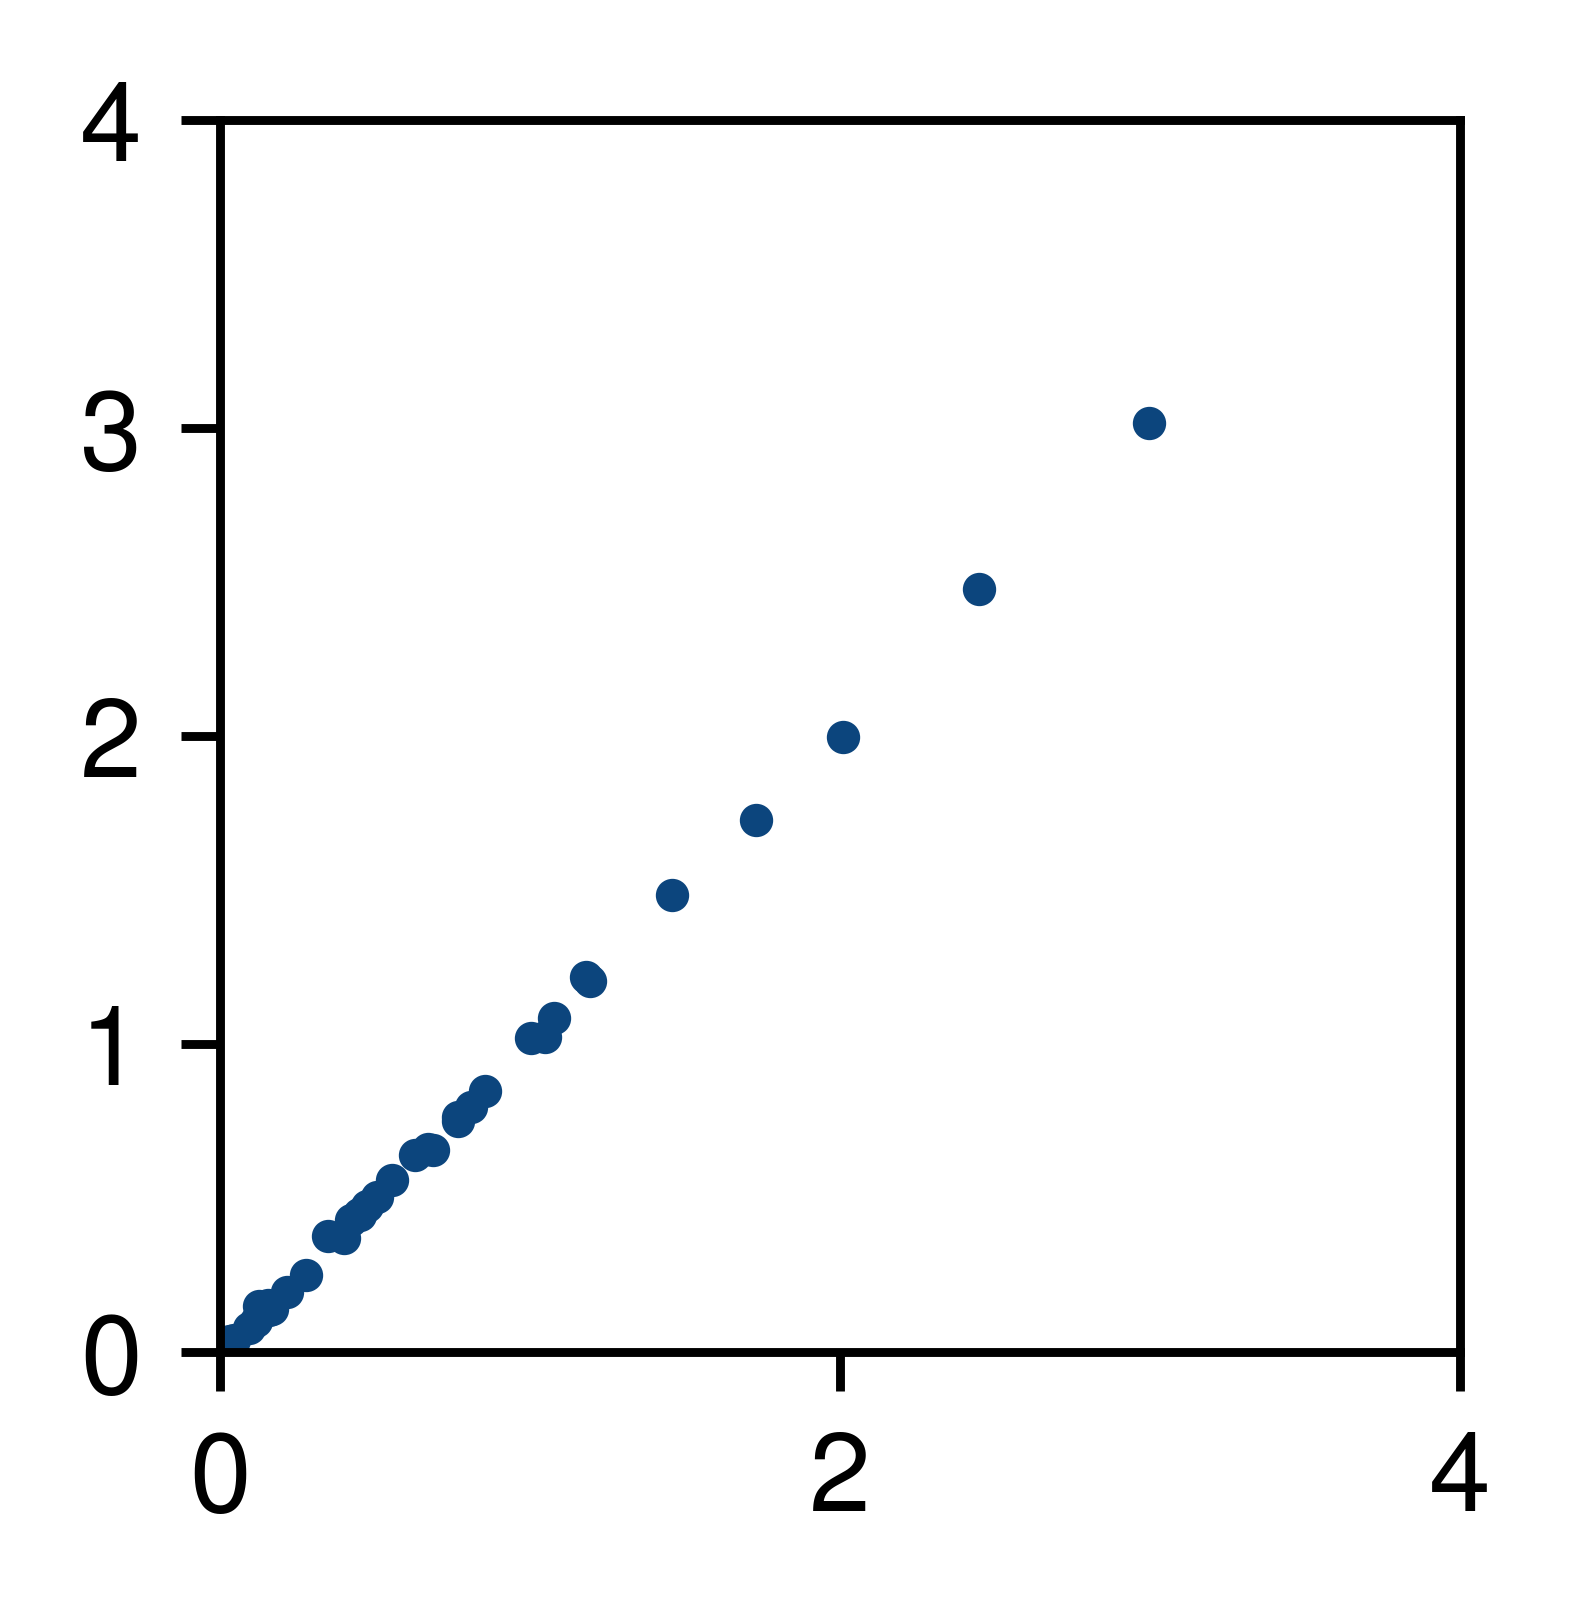

In [131]:
plt.subplots(1,1,figsize=(2,2),dpi=800)
plt.scatter(sample_interp2.detach().cpu().numpy().mean(axis=0),
            np.array(data[2][data[2].obs['condition']==2].X.mean(axis=0)).transpose(),
            s=4,
            c='#0c457d'
           )
plt.xlim([0,4])
plt.ylim([0,4])

In [194]:
sample_interp3.detach().cpu().numpy().shape

(7353, 203)

In [196]:
data[2][data[2].obs['condition']==3].X.shape

(257, 203)

(0.0, 4.0)

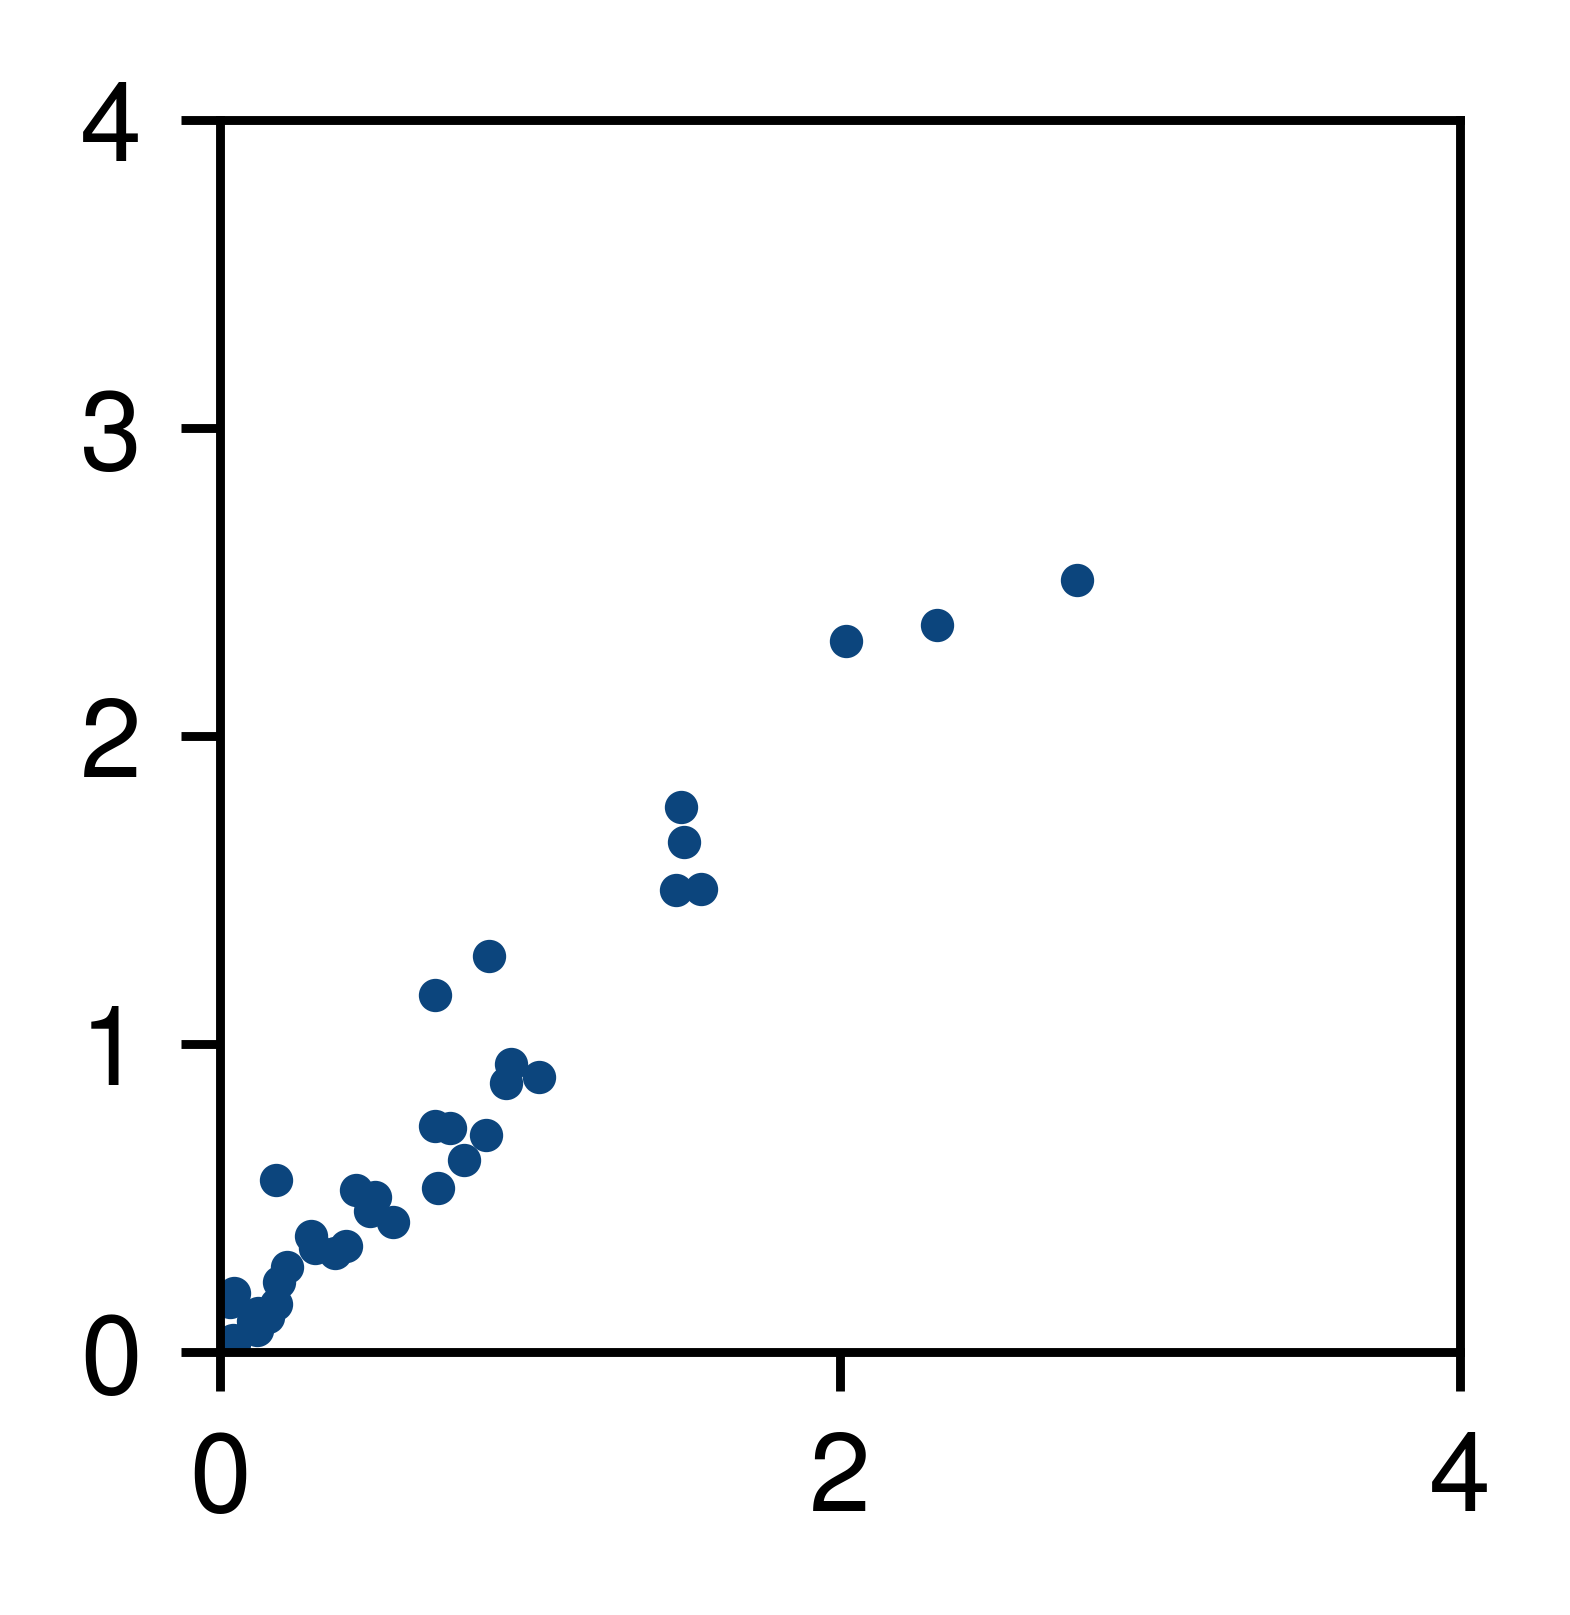

In [193]:
plt.subplots(1,1,figsize=(2,2),dpi=800)
plt.scatter(sample_interp3.detach().cpu().numpy().mean(axis=0),
            np.array(data[2][data[2].obs['condition']==3].X.mean(axis=0)).transpose(),
            s=4,
            c='#0c457d'
           )
plt.xlim([0,4])
plt.ylim([0,4])

In [188]:
import scipy
from sklearn.metrics import r2_score
p_ , _ = scipy.stats.pearsonr(
        np.array(data[2][data[2].obs['condition']==3].X.mean(axis=0)).transpose()[:,0],
        sample_interp3.detach().cpu().numpy().mean(axis=0)
                    )

r_= r2_score(
        np.array(data[2][data[2].obs['condition']==3].X.mean(axis=0)).transpose(),
        sample_interp3.detach().cpu().numpy().mean(axis=0)
                    )
print(p_)
print(r_)

0.9905809642712395
0.9800435900688171


In [135]:
import scipy
from sklearn.metrics import r2_score
p_ , _ = scipy.stats.pearsonr(
        np.array(data[2][data[2].obs['condition']==3].X.mean(axis=0)).transpose()[:,0],
        sample_interp1.detach().cpu().numpy().mean(axis=0)
                    )

r_= r2_score(
        np.array(data[2][data[2].obs['condition']==3].X.mean(axis=0)).transpose(),
        sample_interp1.detach().cpu().numpy().mean(axis=0)
                    )
print(p_)
print(r_)

0.9905488826072112
0.9799427390098572


In [127]:
from sklearn.decomposition import PCA
import umap 
pca = PCA(n_components=30)  # You can adjust the number of components
pca_result = pca.fit_transform(sample_interp1.detach().cpu().numpy())

umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.5, n_components=2)  # Adjust parameters as needed
all_tsne = umap_reducer.fit_transform(pca_result)

#umap_reducer = umap.UMAP(n_components=2,min_dist=0.01)
#all_tsne = umap_reducer.fit_transform(all_reconstructed_x)

NameError: name 'all_weights' is not defined

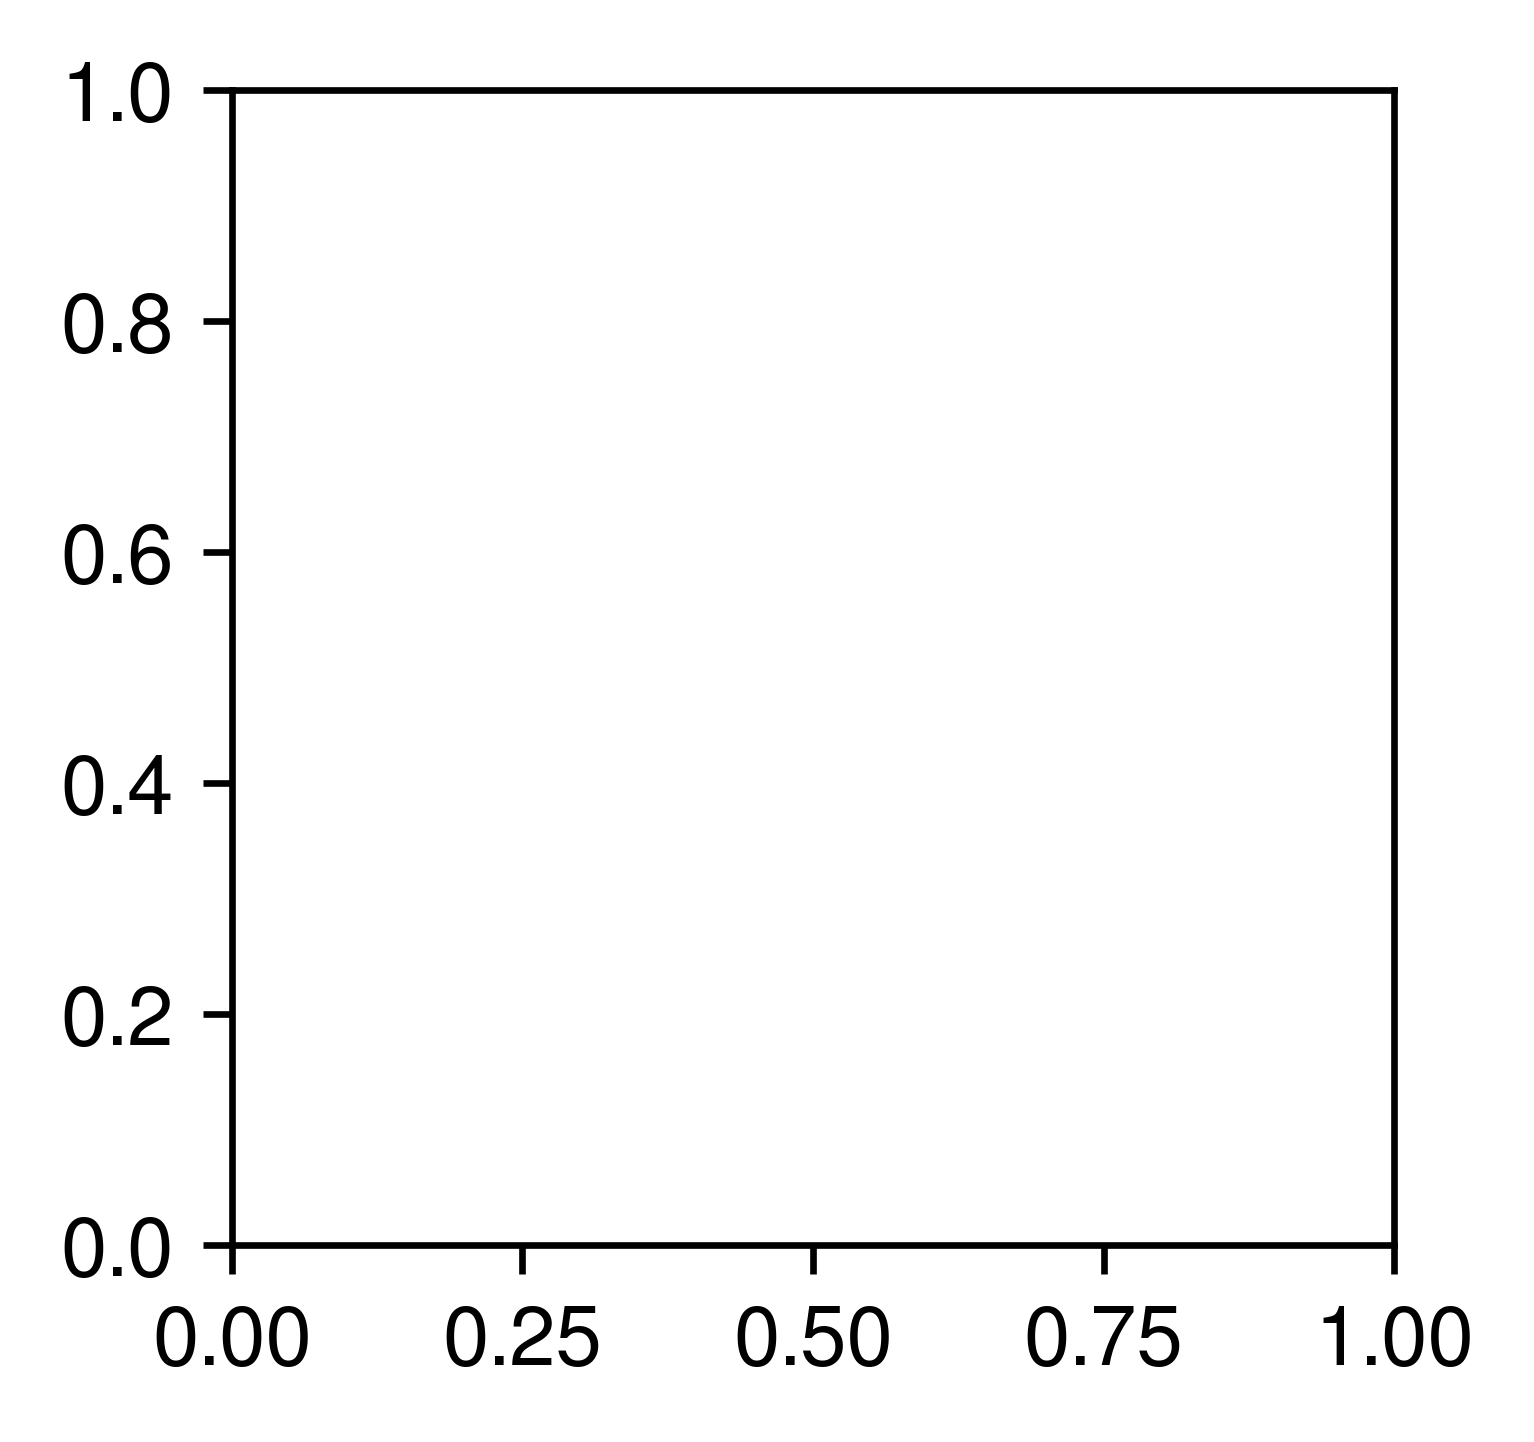

In [135]:
import matplotlib.colors as mcolors
hex_colors = ['#3145a8', '#40a8f7', '#f5bf36','#fa2616']

# Convert hexadecimal to RGB
rgb_colors = [mcolors.to_rgb(color) for color in hex_colors]

# Create a custom colormap from these colors
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", rgb_colors)

rgb_colors = [mcolors.to_rgb(color) for color in hex_colors]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", rgb_colors)
# Create a discrete colormap
#cmap = mcolors.ListedColormap(rgb_colors)


fig, axs = plt.subplots(1,1,figsize=(2.5,2.5),dpi=600)
g=axs.scatter(all_tsne[(all_weights==0)|(all_weights==0.5)|(all_weights==1), 0], 
              all_tsne[(all_weights==0)|(all_weights==0.5)|(all_weights==1), 1], 
              c=all_weights[(all_weights==0)|(all_weights==0.5)|(all_weights==1)],
              cmap=cmap, alpha=0.8,s=0.5, label='Reconstructed')
plt.axis('off')
plt.show()

In [136]:
hex_colors = ['#ffbe4f', '#0ea7b5', '#0c457d','#e8702a']

all_new_data_2 = anndata.AnnData(sample_interp2.detach().cpu().numpy())
all_new_data_2.var_names = adata_ctl.var['gene_name']

all_new_data_3 = anndata.AnnData(sample_interp3.detach().cpu().numpy())
all_new_data_3.var_names = adata_ctl.var['gene_name']


all_new_data_ctrl3 = data[2][data[2].obs['condition']==3].copy()
all_new_data_ctrl3.var_names = all_new_data_ctrl3.var['gene_name']

all_new_data_ctrl2 = data[2][data[2].obs['condition']==2].copy()
all_new_data_ctrl2.var_names = all_new_data_ctrl2.var['gene_name']

In [137]:
gears_model.predict([['PTPN12','ZBTB25']])['PTPN12_ZBTB25']

array([ 2.7874097e-11,  8.8302255e-02,  1.9439398e-01, ...,
        3.2274697e+00,  2.9912589e-03, -3.4720224e-18], dtype=float32)

In [138]:
temp_all= []
for i in range(10):
    temp_all.append(gears_model.predict([['PTPN12','ZBTB25']])['PTPN12_ZBTB25'][None,:])
all_new_data_gears3 = anndata.AnnData(np.concatenate(temp_all))
all_new_data_gears3.var_names = adata_raw.var['gene_name']


temp_all= []
for i in range(10):
    temp_all.append(gears_model.predict([['ZBTB25']])['ZBTB25'][None,:])
all_new_data_gears2 = anndata.AnnData(np.concatenate(temp_all))
all_new_data_gears2.var_names = adata_raw.var['gene_name']


In [234]:
data_ = data[2].copy()
data_.var_names = all_new_data.var_names
data_.obs['pred']=0
all_new_data.obs['pred']=1
all_new_data.obs['condition']=3
concat_data = sc.concat([data_,all_new_data])

sc.pp.pca(concat_data)
sc.pp.neighbors(concat_data)
sc.tl.umap(concat_data,min_dist=0.2)

(2.4989354968070985, 10.488751375675202, 0.3863823503255844, 6.828813722729683)

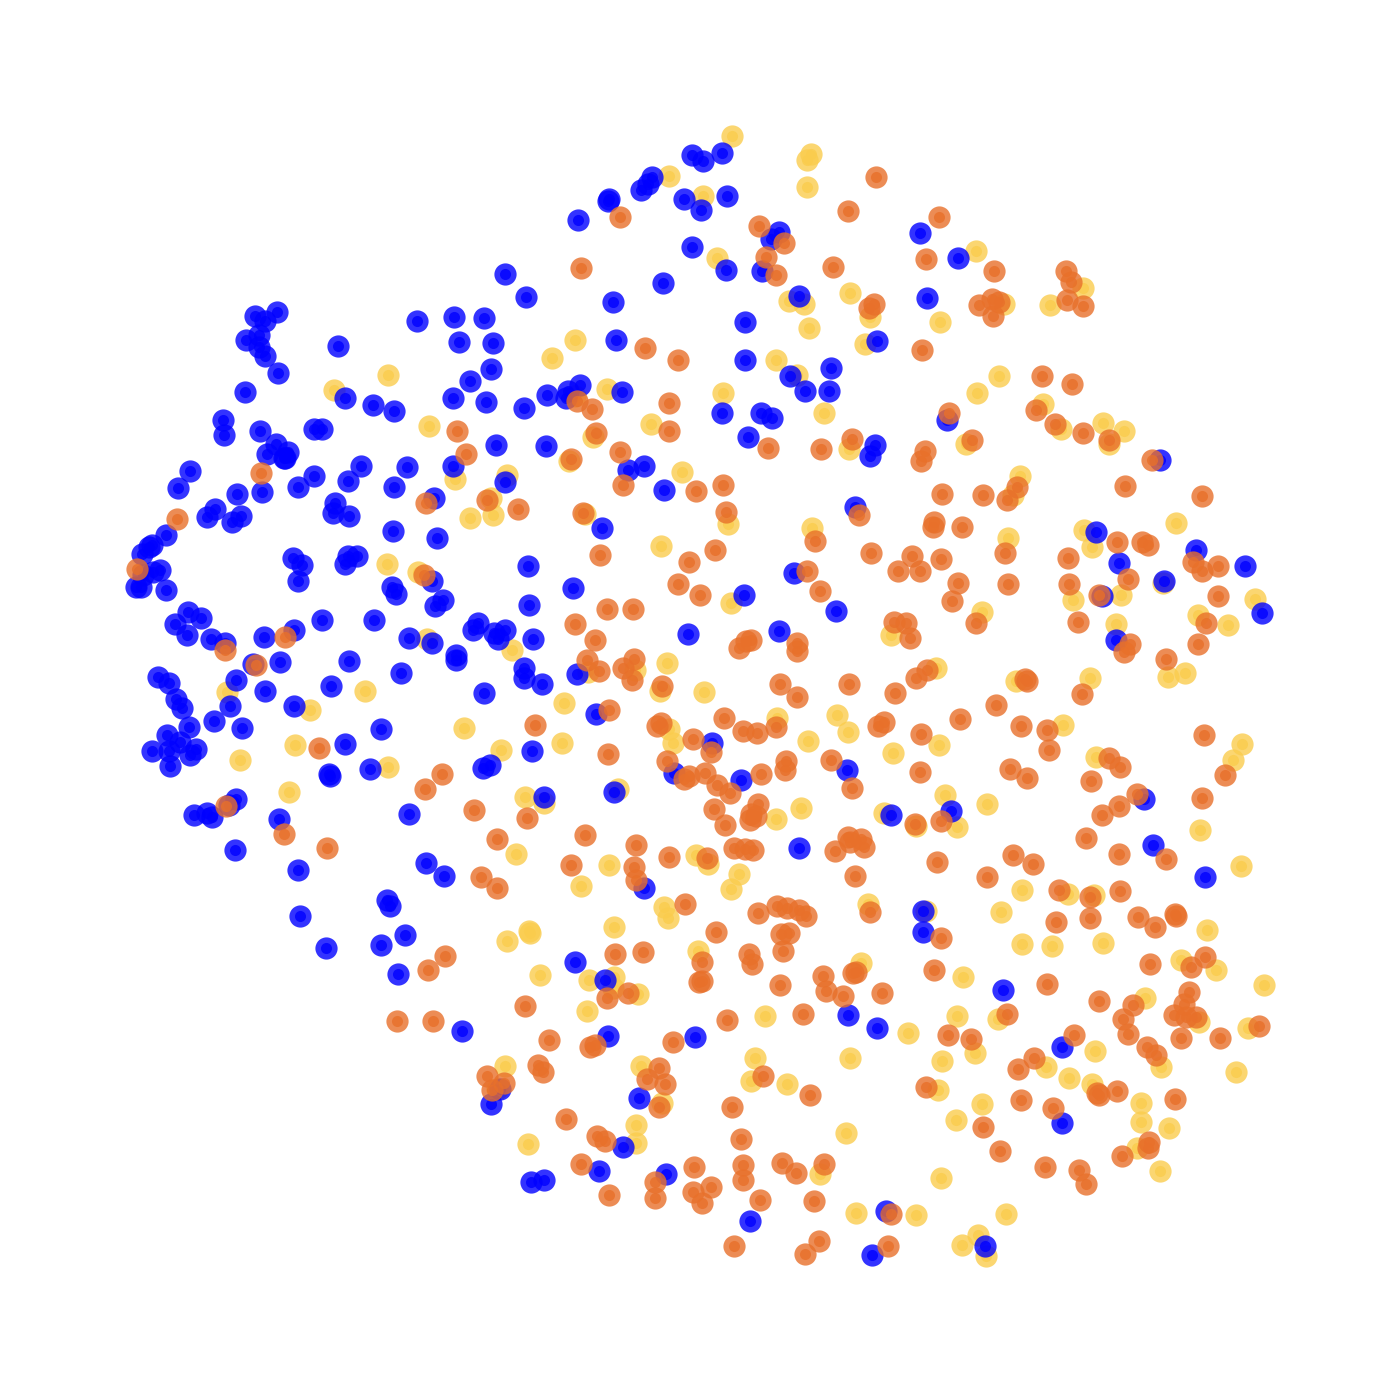

In [244]:
import matplotlib.colors as mcolors
hex_colors = ['k','#ffbe4f', '#0ea7b5','#e8702a']
rgb_colors = [mcolors.to_rgb(color) for color in hex_colors]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", rgb_colors)
fig,axs=plt.subplots(1,1,figsize=(2,2),dpi=800)

axs.scatter(concat_data.obsm['X_umap'][(concat_data.obs['pred']==0)&(concat_data.obs['condition']==1),0],
            concat_data.obsm['X_umap'][(concat_data.obs['pred']==0)&(concat_data.obs['condition']==1),1],
                c='#facc4d',
                s=1,
                alpha=0.8
               )
axs.scatter(concat_data.obsm['X_umap'][(concat_data.obs['pred']==0)&(concat_data.obs['condition']==3),0],
            concat_data.obsm['X_umap'][(concat_data.obs['pred']==0)&(concat_data.obs['condition']==3),1],
                c='blue',
                s=1,
                alpha=0.8
               )
axs.scatter(concat_data.obsm['X_umap'][(concat_data.obs['pred']==0)&(concat_data.obs['condition']==2),0],
            concat_data.obsm['X_umap'][(concat_data.obs['pred']==0)&(concat_data.obs['condition']==2),1],
                c='#e8702a',
                s=1,
                alpha=0.8
               )

plt.axis('off')

#facc4d #e8702a

(0.0, 4.0)

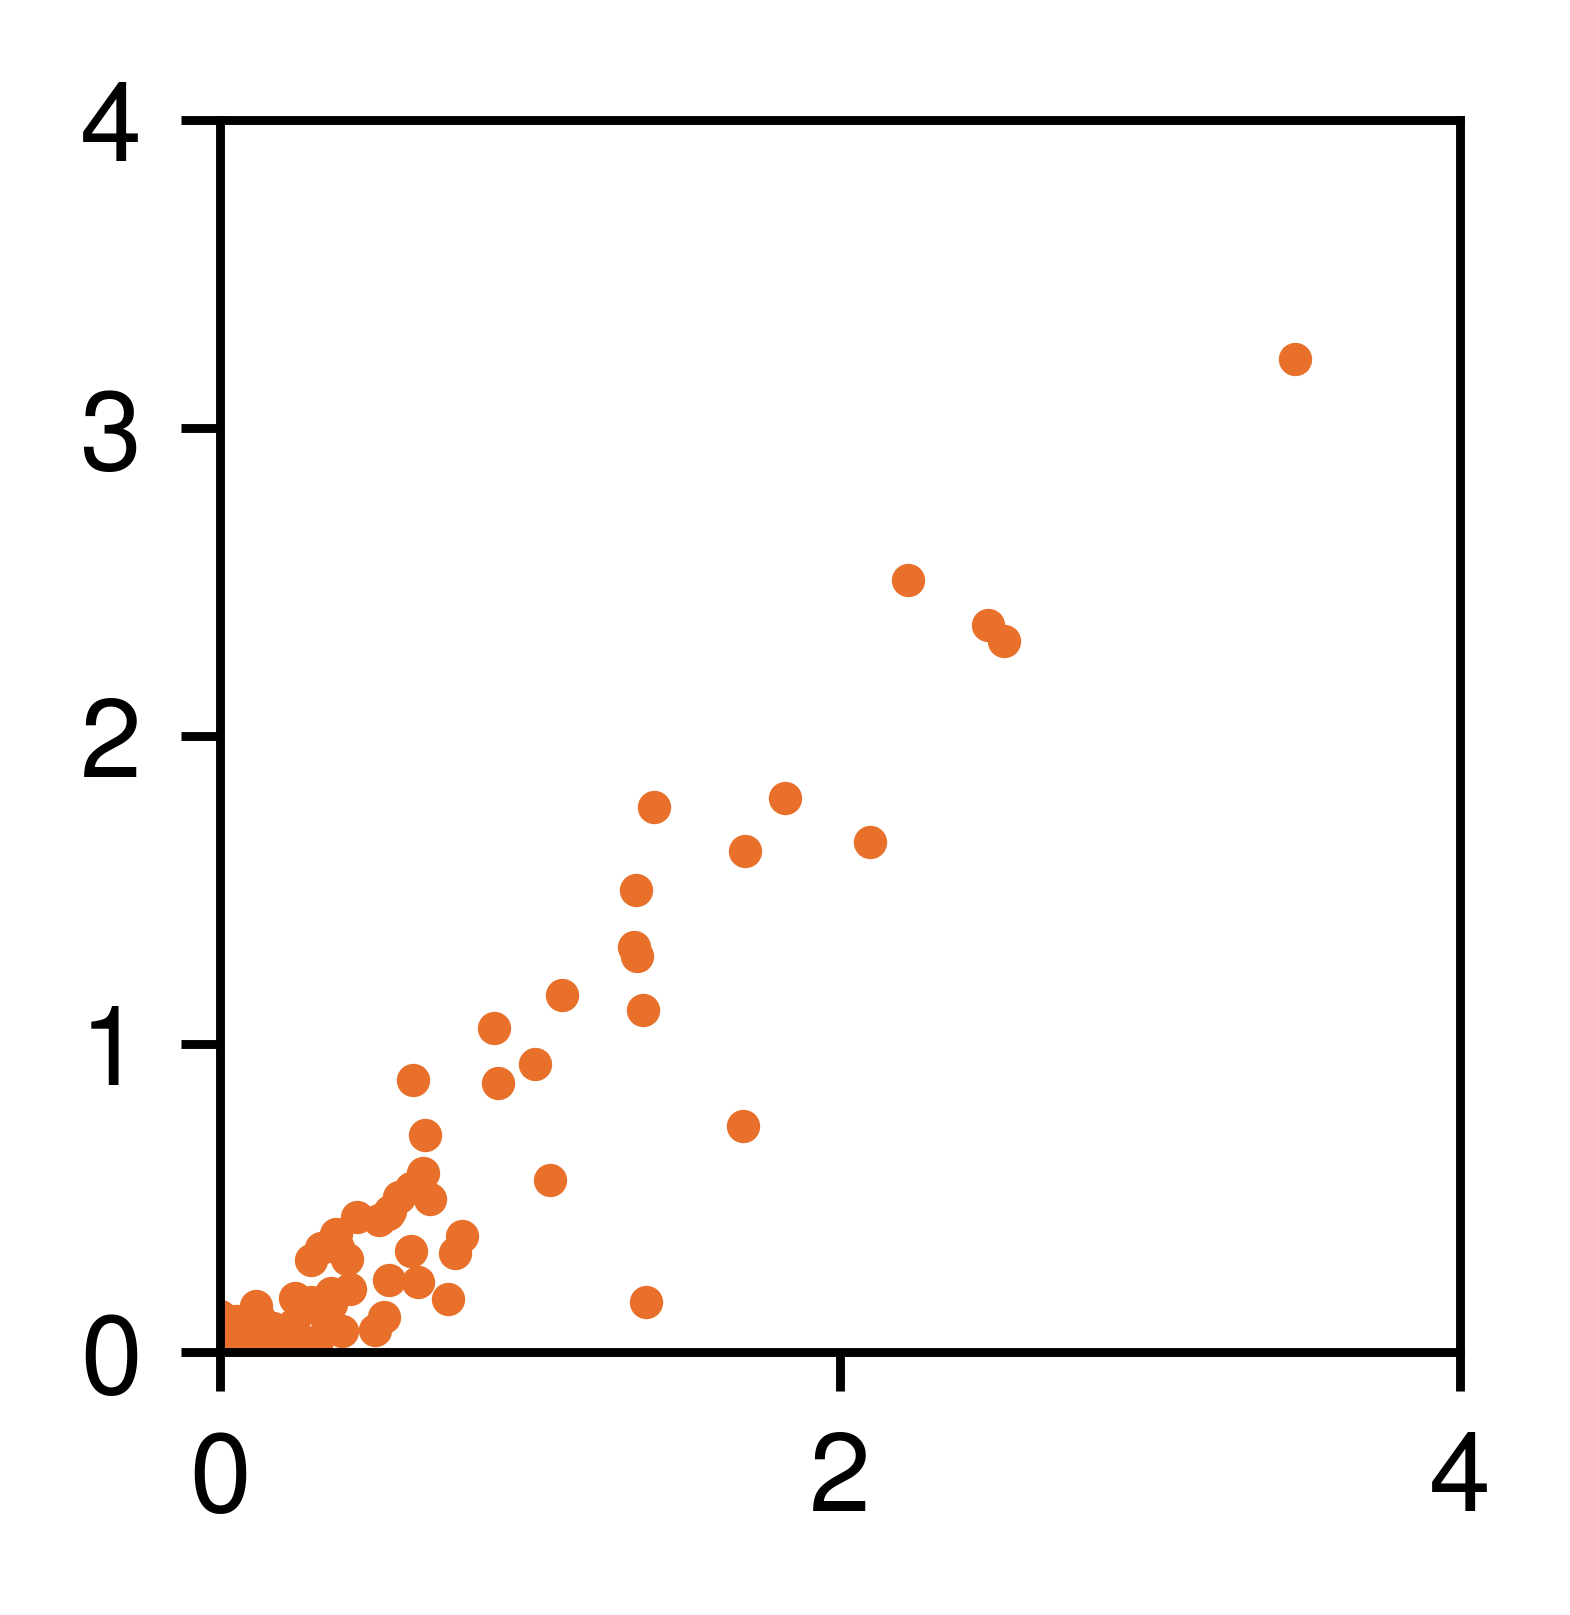

In [187]:
plt.subplots(1,1,figsize=(2,2),dpi=800)
plt.scatter(all_new_data_gears[:,all_new_data.var_names].X.mean(axis=0),
            np.array(data[2][data[2].obs['condition']==3].X.mean(axis=0)).transpose(),
            s=4,
            c='#e8702a'
           )
plt.xlim([0,4])
plt.ylim([0,4])

In [193]:
import scipy
from sklearn.metrics import r2_score
p_ , _ = scipy.stats.pearsonr(
           all_new_data_gears[:,all_new_data.var_names].X.mean(axis=0),
            np.array(data[2][data[2].obs['condition']==3].X.mean(axis=0)).transpose()[:,0],
                       )

r_= r2_score(
        all_new_data_gears[:,all_new_data.var_names].X.mean(axis=0),
            np.array(data[2][data[2].obs['condition']==3].X.mean(axis=0)).transpose(),
                        )
print(p_)
print(r_)

0.9540304220185456
0.8967714905738831


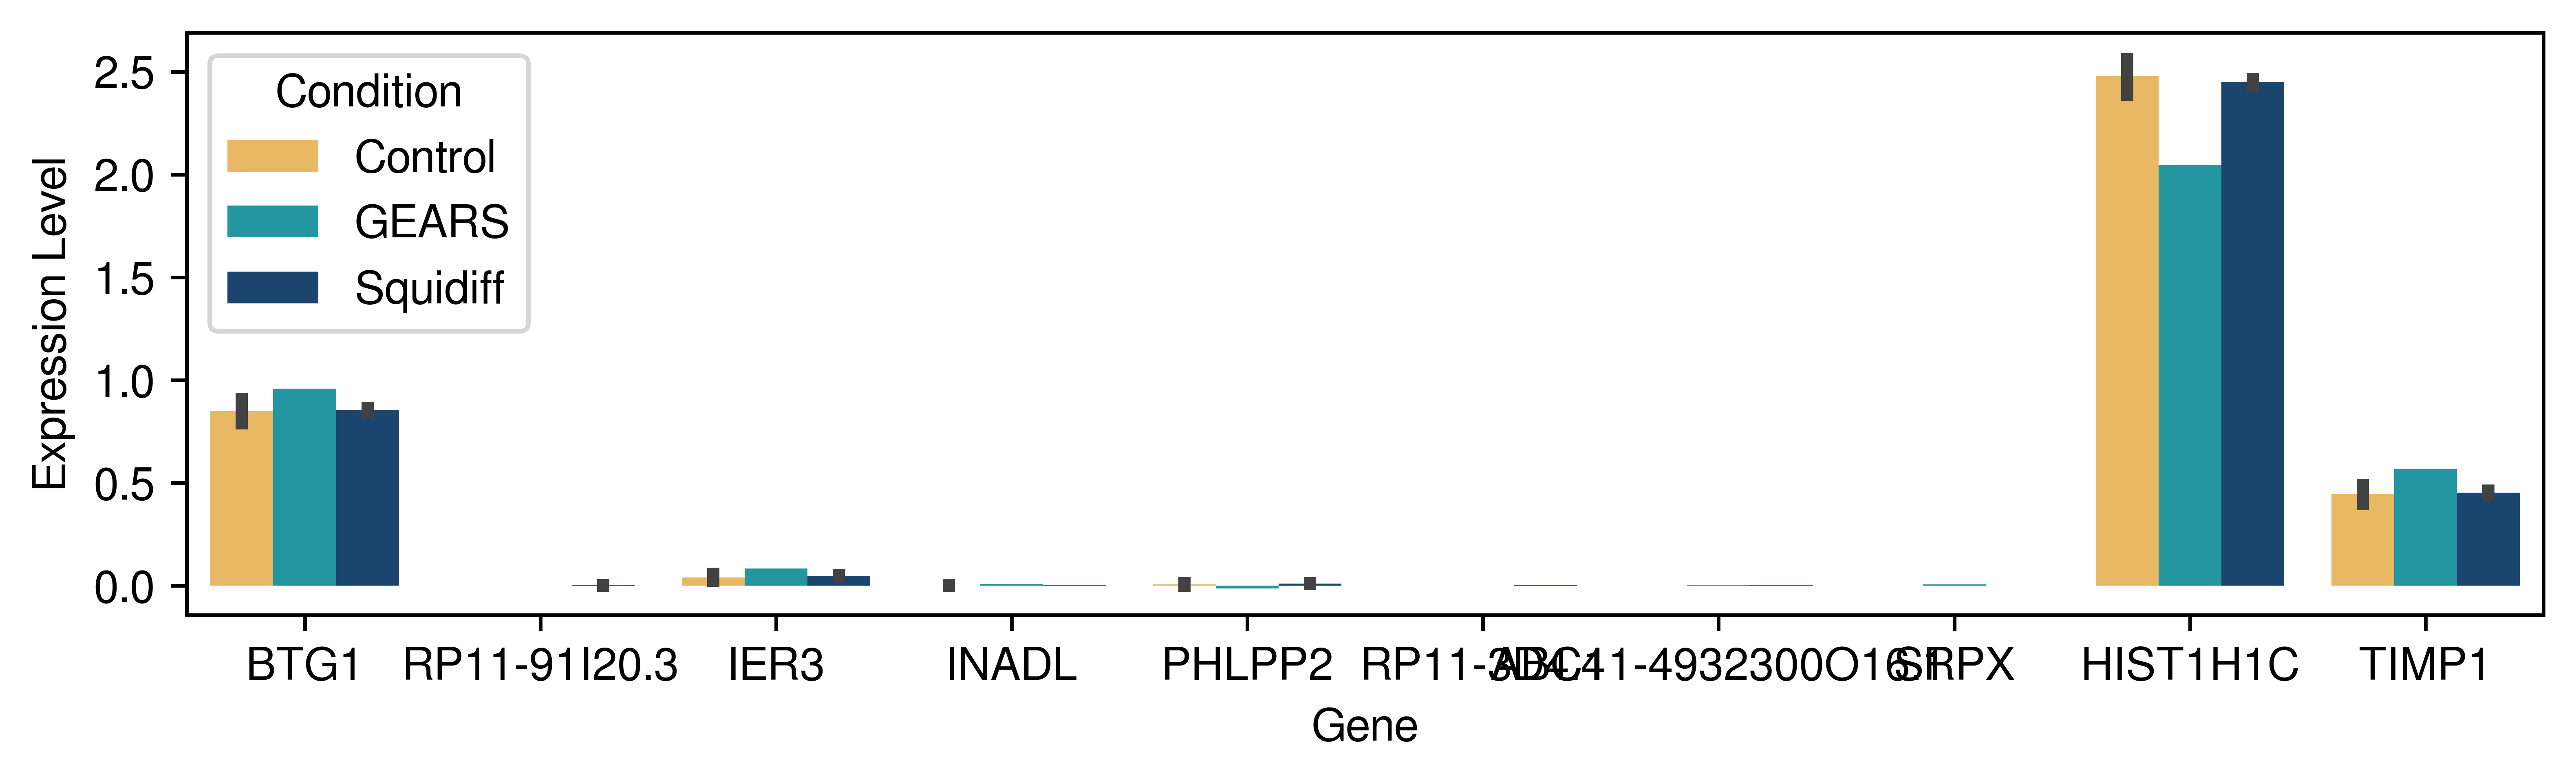

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
# Assuming all_new_data, all_new_data_ctrl, and all_new_data_gears are AnnData objects
# and each has a .to_df() method that returns a pandas DataFrame of gene expression data
# with genes along the columns and samples along the rows.

# Let's also assume that you have a list of gene names to plot
random_indices = random.sample(range(len(all_new_data_2.var_names)), 10)
genes_of_interest = all_new_data_2.var_names[random_indices]#['SLC25A37', 'HBA1', 'HBA2']  # replace with your actual gene names

# Create a DataFrame for each condition
df_data = all_new_data_2.to_df()[genes_of_interest]

df_data_ctrl = all_new_data_ctrl2.to_df()[genes_of_interest]
df_data_gears = all_new_data_gears2.to_df()[genes_of_interest]

# Add a 'Condition' column to distinguish the data sources
df_data['Condition'] = 'Squidiff'
df_data_ctrl['Condition'] = 'Control'
df_data_gears['Condition'] = 'GEARS'

# Concatenate the DataFrames into a single DataFrame
df_combined = pd.concat([df_data_ctrl, df_data_gears,df_data], axis=0).reset_index(drop=True)

# Melt the DataFrame to long-form for seaborn
df_long = pd.melt(df_combined, id_vars=['Condition'], var_name='Gene', value_name='Expression')
cmap = ['#ffbe4f', '#0ea7b5', '#0c457d','#e8702a']
# Now create the bar plot
plt.figure(figsize=(8, 2.5),dpi=800)
sns.barplot(data=df_long, x='Gene', y='Expression', hue='Condition',palette=cmap)
#plt.title('Gene Expression Levels by Condition')
plt.ylabel('Expression Level')
plt.xlabel('Gene')

# Show the plot
plt.tight_layout()
plt.show()


## scgen

In [142]:
import scanpy as sc
import scgen

In [271]:
data_scgen = data[2][data[2].obs['condition']!=3].copy()

In [272]:
scgen.SCGEN.setup_anndata(data_scgen, batch_key="condition")


In [273]:
scgen_model = scgen.SCGEN(data_scgen)
scgen_model.save("/hpc/mydata/siyu.he/squidward_study/results/fig3/scgen_model_perturb_prediction.pt", overwrite=True)

In [274]:
scgen_model.train(
    max_epochs=500,
    batch_size=16,
    early_stopping=True,
    early_stopping_patience=25
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 26/500:   5%|▌         | 26/500 [01:46<32:23,  4.10s/it, v_num=1, train_loss_step=1.41, train_loss_epoch=1.29]
Monitored metric elbo_validation did not improve in the last 25 records. Best score: 170.865. Signaling Trainer to stop.


In [177]:
latent_X.shape

(537, 100)

In [275]:
data[2]

AnnData object with n_obs × n_vars = 8147 × 203
    obs: 'condition'
    var: 'gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'neighbors', 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'pca', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [278]:
label = data_scgen.obs['condition']

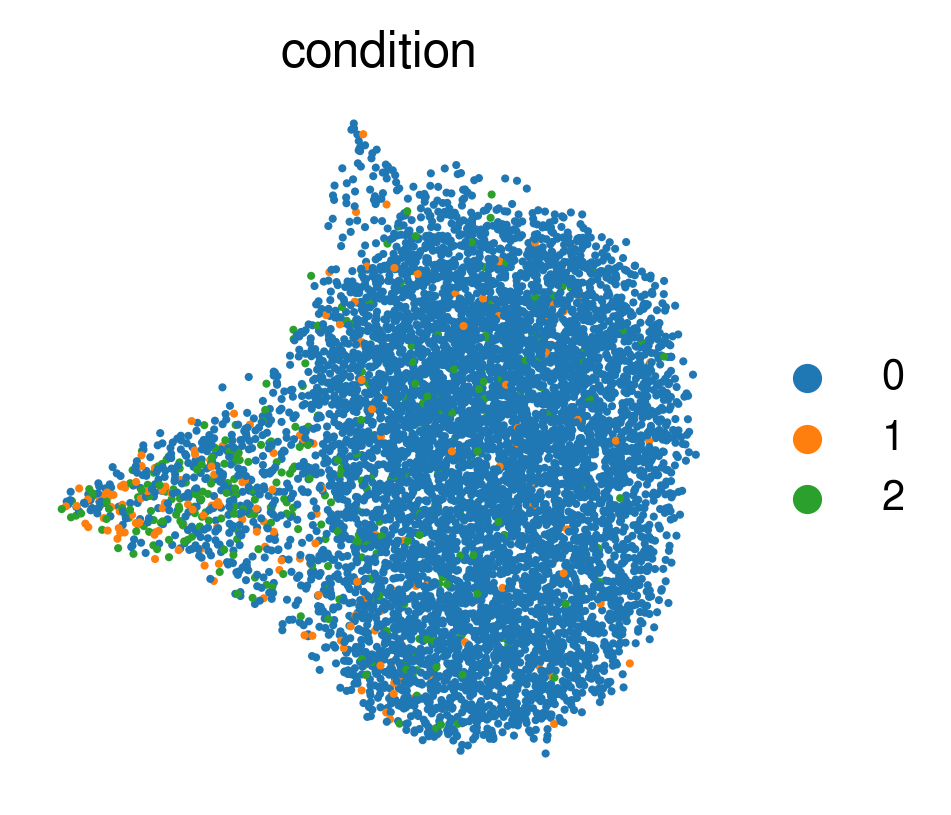

IndexError: boolean index did not match indexed array along dimension 0; dimension is 7890 but corresponding boolean dimension is 8147

In [277]:
latent_X = scgen_model.get_latent_representation()
latent_adata = sc.AnnData(X=latent_X, obs=data_scgen.obs.copy())
sc.pp.neighbors(latent_adata)
sc.tl.umap(latent_adata)
sc.pl.umap(latent_adata, color=['condition'], wspace=0.4, frameon=False,
           save='latentspace_batch32_klw000005_z100__100e.pdf')


In [279]:
z_sem_1 = latent_X[label ==1].mean(axis=0)
z_sem_2 = latent_X[label ==2].mean(axis=0)
z_sem_0 = latent_X[label ==0].mean(axis=0)

interp_double = scgen_model.module.generative(torch.tensor(latent_X[label ==0]+z_sem_2-z_sem_0+z_sem_1-z_sem_0))['px']
all_new_data_scgen3 = anndata.AnnData(interp_double.detach().cpu().numpy())
all_new_data_scgen3.var_names = data[0].var['gene_name']

interp_double = scgen_model.module.generative(torch.tensor(latent_X[label ==0]+z_sem_2-z_sem_0))['px']
all_new_data_scgen2 = anndata.AnnData(interp_double.detach().cpu().numpy())
all_new_data_scgen2.var_names = data[0].var['gene_name']

In [397]:
#genes_of_interest = pd.DataFrame(all_new_data_ctrl.to_df().mean(axis=0)).sort_values(by=0)[-10:].index 

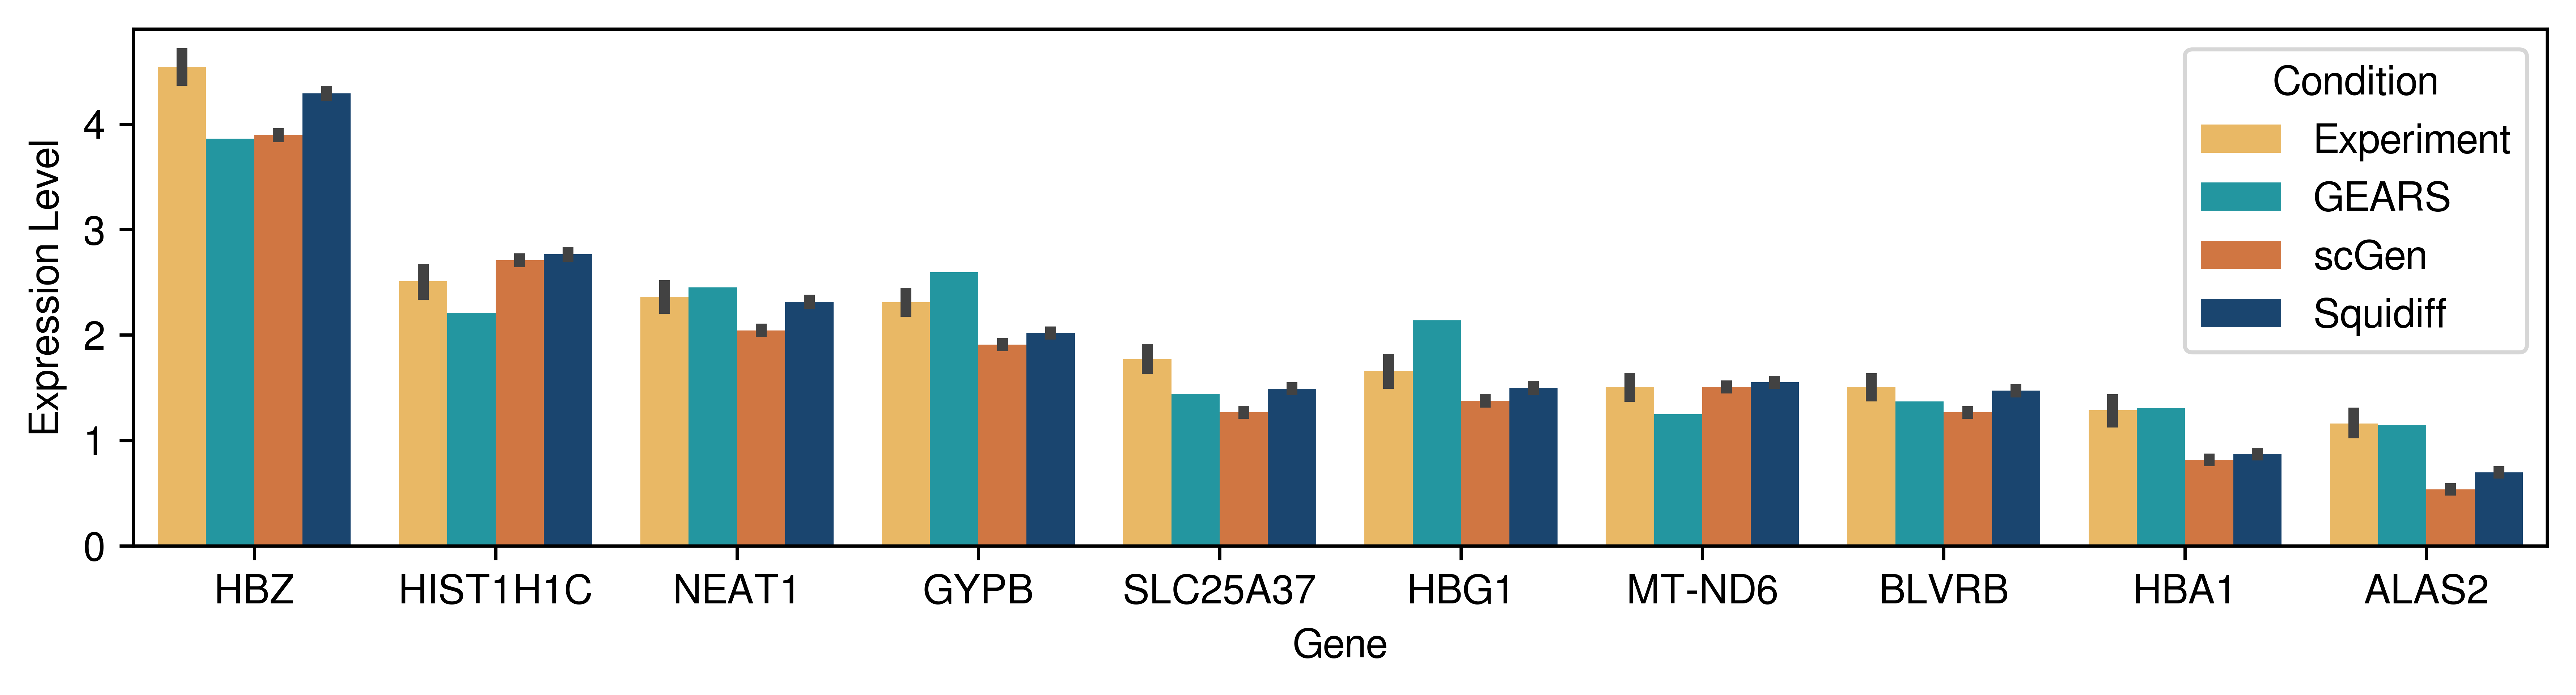

In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming all_new_data, all_new_data_ctrl, and all_new_data_gears are AnnData objects
# and each has a .to_df() method that returns a pandas DataFrame of gene expression data
# with genes along the columns and samples along the rows.

# Let's also assume that you have a list of gene names to plot
#genes_of_interest = all_new_data_3.var_names[:12]#['SLC25A37', 'HBA1', 'HBA2']  # replace with your actual gene names


random_indices = random.sample(range(len(all_new_data_2.var_names)), 12)
genes_of_interest = all_new_data_3.var_names[random_indices]#['SLC25A37', 'HBA1', 'HBA2']  # replace with your actual gene names


# Create a DataFrame for each condition
df_data = all_new_data_3.to_df()[genes_of_interest]
df_data_ctrl = all_new_data_ctrl3.to_df()[genes_of_interest]
df_data_gears = all_new_data_gears3.to_df()[genes_of_interest]
df_data_scgen = all_new_data_scgen3.to_df()[genes_of_interest]

# Add a 'Condition' column to distinguish the data sources

df_data_ctrl['Condition'] = 'Experiment'
df_data_gears['Condition'] = 'GEARS'
df_data_scgen['Condition'] = 'scGen'
df_data['Condition'] = 'Squidiff'

# Concatenate the DataFrames into a single DataFrame
df_combined = pd.concat([df_data_ctrl, df_data_gears,df_data_scgen, df_data], axis=0).reset_index(drop=True)

# Melt the DataFrame to long-form for seaborn
df_long = pd.melt(df_combined, id_vars=['Condition'], var_name='Gene', value_name='Expression')
cmap = ['#ffbe4f', '#0ea7b5', '#e8702a','#0c457d',]
# Now create the bar plot
plt.figure(figsize=(9, 2.5),dpi=800)
sns.barplot(data=df_long, x='Gene', y='Expression', hue='Condition',palette=cmap)
#plt.title('Gene Expression Levels by Condition')
plt.ylabel('Expression Level')
plt.xlabel('Gene')

# Show the plot
plt.tight_layout()
plt.show()


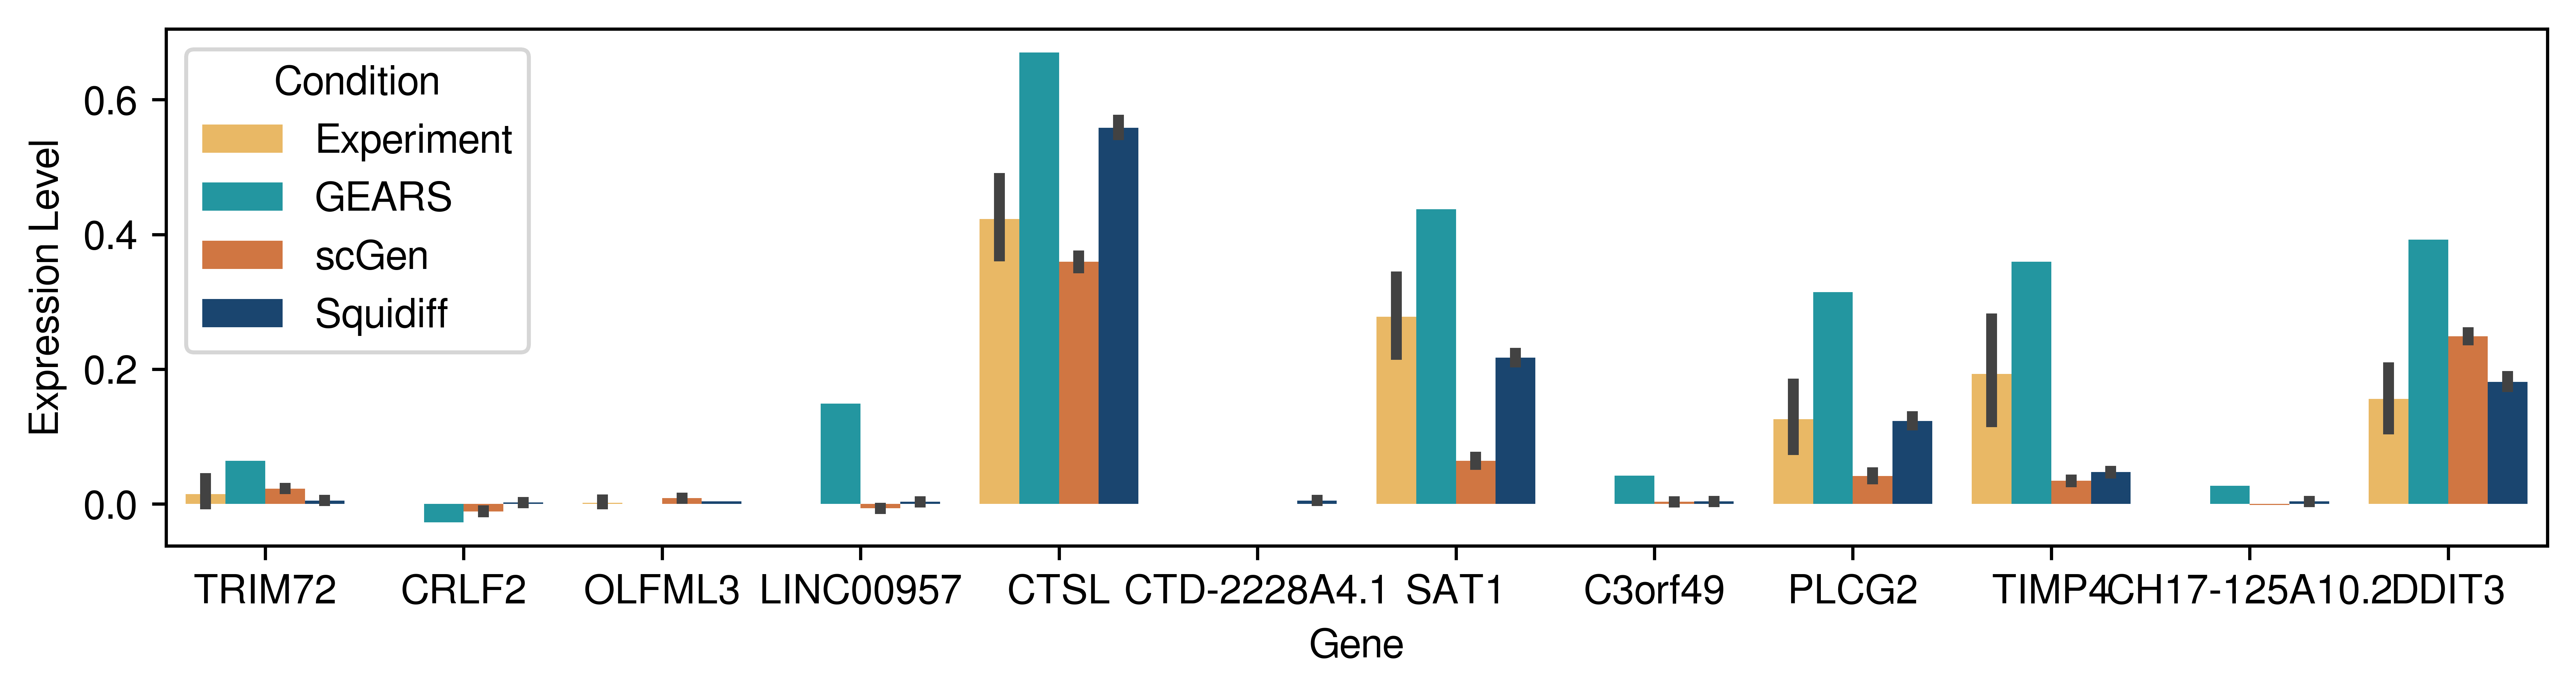

In [221]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Simulate gene names and expression data
np.random.seed(42)

mean_expression_ctrl3 = all_new_data_ctrl3.to_df().mean(axis=0)

# Step 2: Find the gene names sorted from lowest to highest mean expression
sorted_genes = mean_expression_ctrl3.nlargest(140).index.tolist()

# Step 3: Randomly select 10 genes from the lowest-expressing genes
genes_of_interest = random.sample(sorted_genes, 12)
genes_of_interest

# Create DataFrames for each condition
df_data = all_new_data_3.to_df()[genes_of_interest]
df_data_ctrl = all_new_data_ctrl3.to_df()[genes_of_interest]
df_data_gears = all_new_data_gears3.to_df()[genes_of_interest]
df_data_scgen = all_new_data_scgen3.to_df()[genes_of_interest]

# Label each DataFrame with the corresponding condition
df_data_ctrl['Condition'] = 'Experiment'
df_data_gears['Condition'] = 'GEARS'
df_data_scgen['Condition'] = 'scGen'
df_data['Condition'] = 'Squidiff'

# Concatenate into a single DataFrame
df_combined = pd.concat([df_data_ctrl, df_data_gears, df_data_scgen, df_data], axis=0).reset_index(drop=True)

# Melt the DataFrame for seaborn
df_long = pd.melt(df_combined, id_vars=['Condition'], var_name='Gene', value_name='Expression')

# Set color palette
cmap = ['#ffbe4f', '#0ea7b5', '#e8702a', '#0c457d']

# Calculate p-values for each gene using ANOVA
p_values = {}
for gene in genes_of_interest:
    # Select data per gene grouped by condition
    groups = [df_combined[df_combined['Condition'] == condition][gene] for condition in df_combined['Condition'].unique()]
    # Perform ANOVA
    p_values[gene] = f_oneway(*groups).pvalue

# Now create the bar plot with ANOVA p-values annotated
plt.figure(figsize=(9, 2.5),dpi=800)
sns.barplot(data=df_long, x='Gene', y='Expression', hue='Condition', palette=cmap)
plt.ylabel('Expression Level')
plt.xlabel('Gene')

# Show the plot
plt.tight_layout()
plt.show()


In [222]:
p_values

{'TRIM72': 0.0,
 'CRLF2': 1.924589887145846e-228,
 'OLFML3': 1.1580117159709934e-231,
 'LINC00957': 0.0,
 'CTSL': 1.1904030984404234e-159,
 'CTD-2228A4.1': 5.783654340843944e-284,
 'SAT1': 5.318304391319567e-254,
 'C3orf49': 5.420569424466406e-159,
 'PLCG2': 8.213793826958428e-96,
 'TIMP4': 9.086623416130262e-152,
 'CH17-125A10.2': 0.0,
 'DDIT3': 1.8532512421497248e-46}

Pearson correlation: mean = 0.9903127358431822 , 95% CI = [0.98900248 0.99199143]
R-squared: mean = 0.977737832069397 , 95% CI = [0.97212597 0.98158676]
MMD: mean = 1.931190490722656e-06 , 95% CI = [2.92062759e-07 4.01139259e-06]
Pearson correlation (GEARS): mean = 0.946086979314499 , 95% CI = [0.94470026 0.9475962 ]
R-squared (GEARS): mean = 0.8851964414119721 , 95% CI = [0.88236737 0.88815796]
MMD (GEARS): mean = 0.00022073984146118165 , 95% CI = [0.00020501 0.00023444]
Pearson correlation (scGen): mean = 0.983060003156635 , 95% CI = [0.98096898 0.98500162]
R-squared (scGen): mean = 0.9435178518295289 , 95% CI = [0.93686646 0.95222584]
MMD (scGen): mean = 1.627206802368164e-05 , 95% CI = [1.05082989e-05 2.14636326e-05]
t-statistic: -67.96515286234299
p-value: 3.716488653573868e-23
t-statistic: -102.0284541406276
p-value: 2.5253926361817324e-26
t-statistic: 13.445899267883231
p-value: 7.917804027336914e-11
t-statistic: -30.269310603960193
p-value: 6.84600792743692e-17
t-statistic: -83

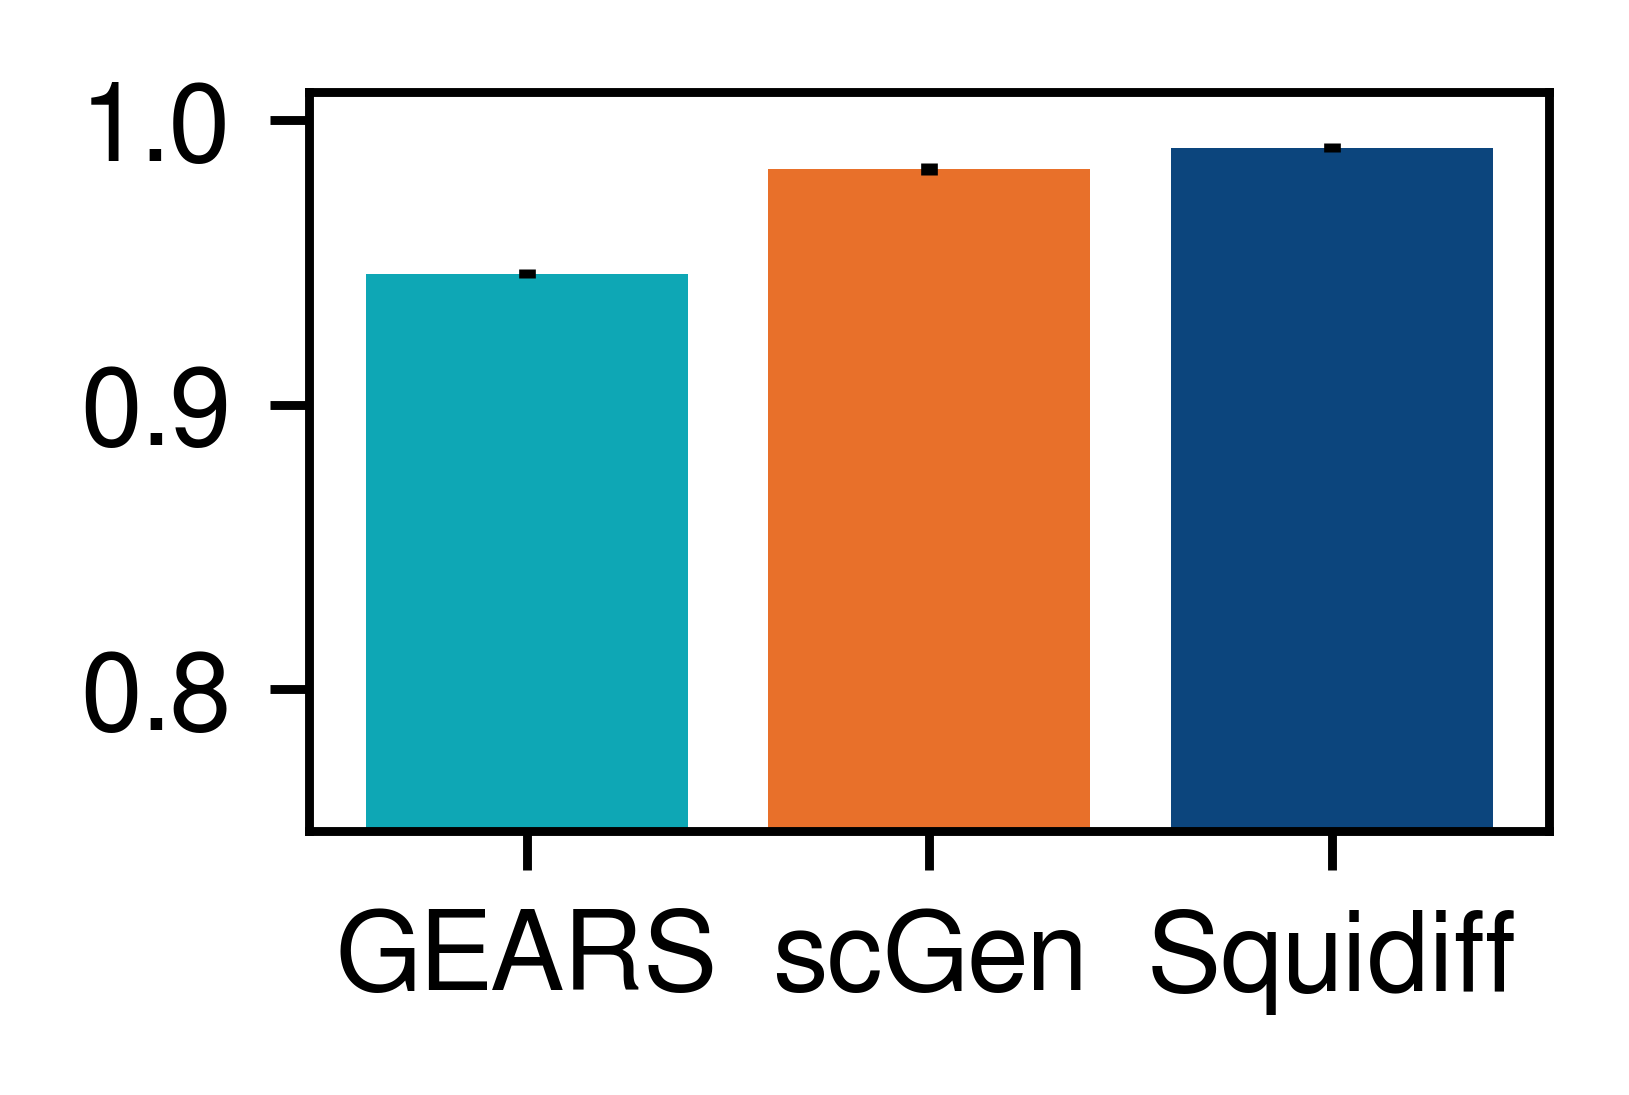

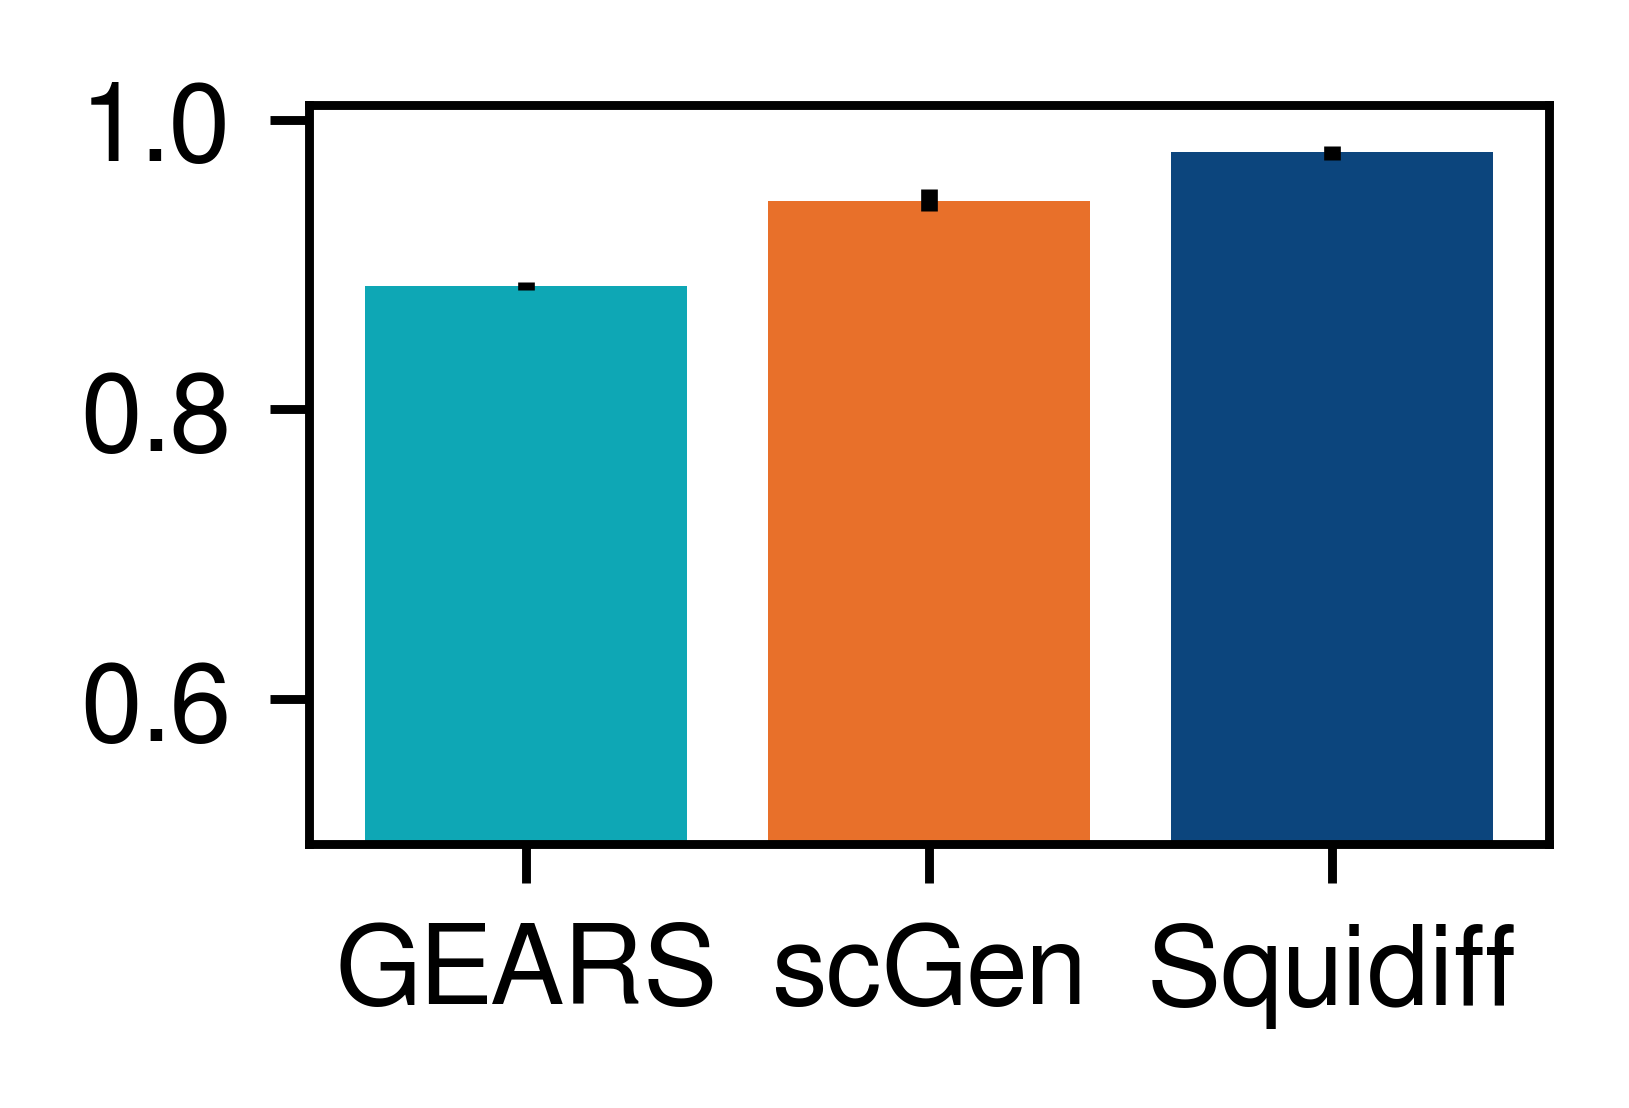

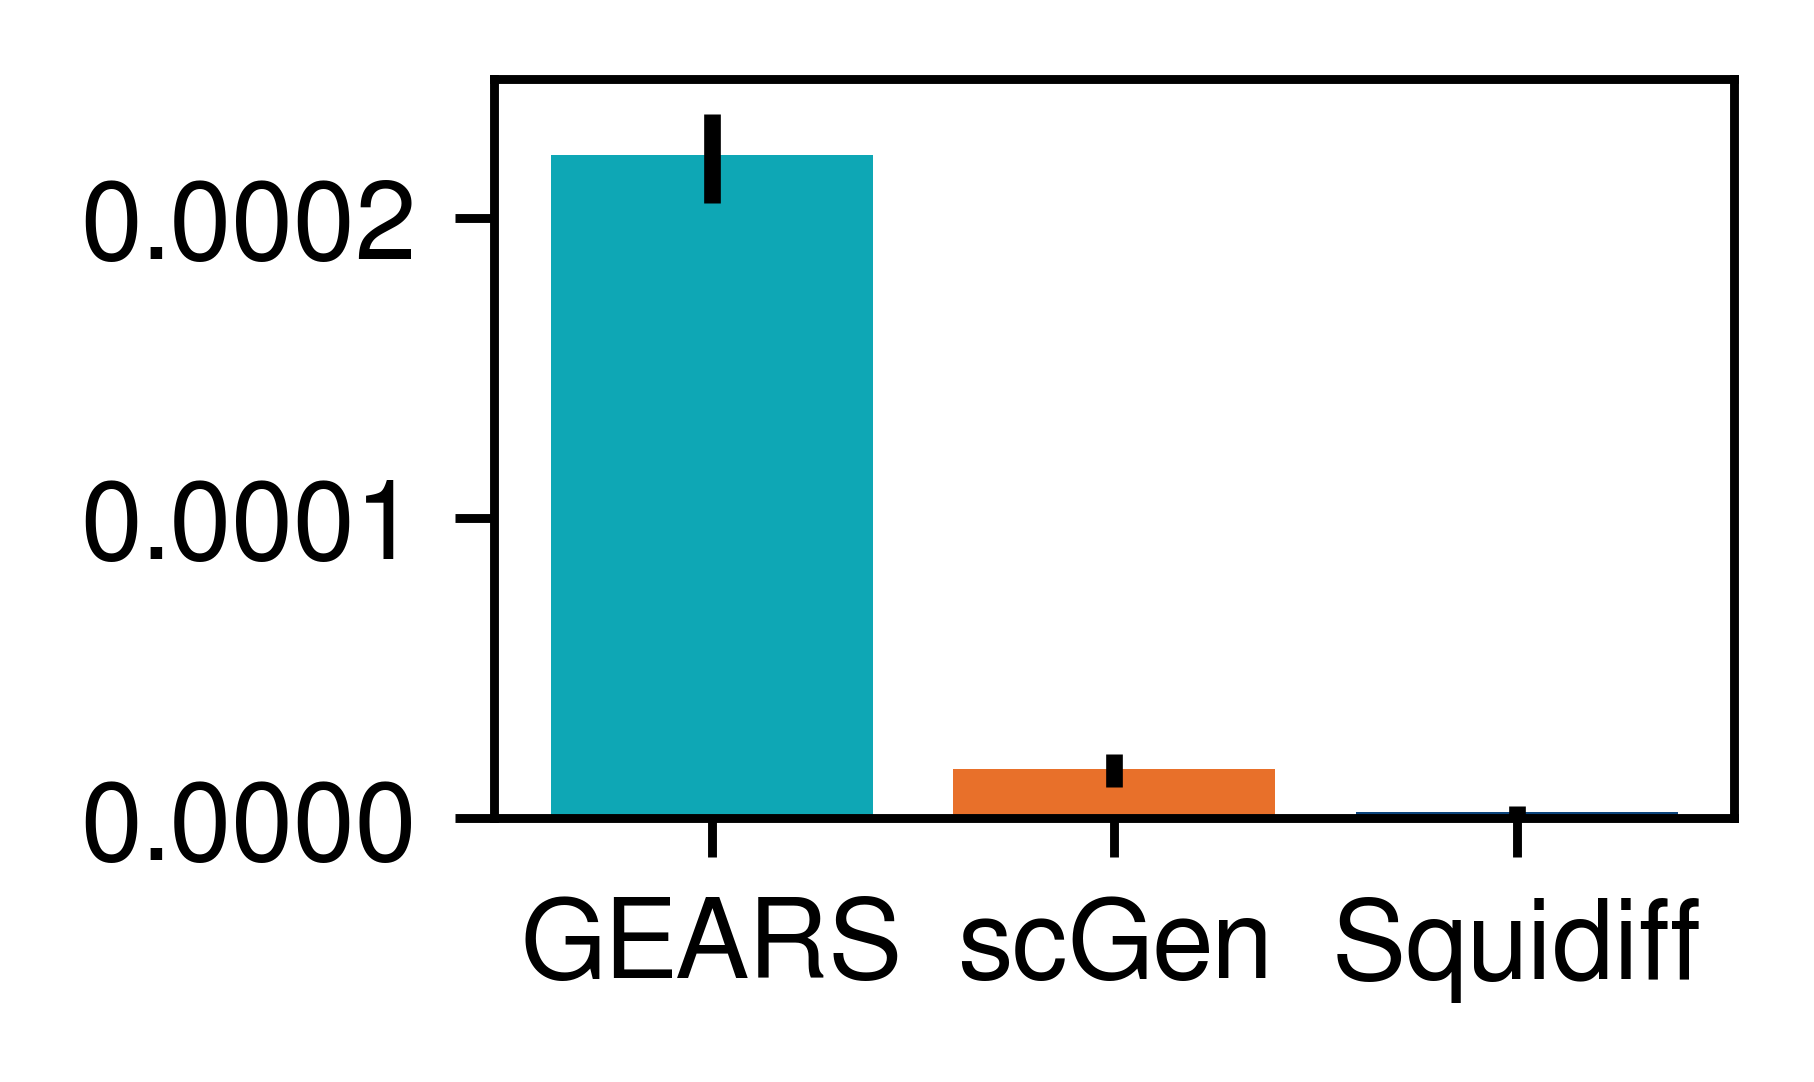

In [280]:

from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.metrics.pairwise import rbf_kernel


def calculate_metrics(x, y):
    r, _ = pearsonr(x, y)
    r2 = r2_score(x, y)
    return r, r2

def calculate_mmd(x, y, gamma=0.05):
    xx = rbf_kernel(x[:, np.newaxis], x[:, np.newaxis], gamma)
    yy = rbf_kernel(y[:, np.newaxis], y[:, np.newaxis], gamma)
    xy = rbf_kernel(x[:, np.newaxis], y[:, np.newaxis], gamma)
    mmd = xx.mean() + yy.mean() - 2 * xy.mean()
    return mmd

# Bootstrap resampling
def bootstrap_metrics(adata1, adata2, n_iterations=10):
    r_values = []
    r2_values = []
    mmd_values = []

    n_cells1 = adata1.shape[0]
    n_cells2 = adata2.shape[0]

    for _ in range(n_iterations):
        indices1 = np.random.choice(n_cells1, n_cells1, replace=True)
        indices2 = np.random.choice(n_cells2, n_cells2, replace=True)
        
        x_resampled = np.mean(adata1.X[indices1], axis=0).flatten()
        y_resampled = np.array(np.mean(adata2.X[indices2], axis=0)).flatten()


        r, r2 = calculate_metrics(x_resampled, y_resampled)
        mmd = calculate_mmd(x_resampled, y_resampled)

        r_values.append(r)
        r2_values.append(r2)
        mmd_values.append(mmd)

    return np.array(r_values), np.array(r2_values), np.array(mmd_values)

# Perform bootstrapping for the datasets
r_values, r2_values, mmd_values = bootstrap_metrics(all_new_data_3, all_new_data_ctrl3)
r_values_gears, r2_values_gears, mmd_values_gears = bootstrap_metrics(all_new_data_gears3[:, all_new_data_ctrl3.var_names], all_new_data_ctrl3)
r_values_scgen, r2_values_scgen, mmd_values_scgen = bootstrap_metrics(all_new_data_scgen3, all_new_data_ctrl3)

# Calculate confidence intervals
r_ci = np.percentile(r_values, [2.5, 97.5])
r2_ci = np.percentile(r2_values, [2.5, 97.5])
mmd_ci = np.percentile(mmd_values, [2.5, 97.5])

r_ci_gears = np.percentile(r_values_gears, [2.5, 97.5])
r2_ci_gears = np.percentile(r2_values_gears, [2.5, 97.5])
mmd_ci_gears = np.percentile(mmd_values_gears, [2.5, 97.5])

r_ci_scgen = np.percentile(r_values_scgen, [2.5, 97.5])
r2_ci_scgen = np.percentile(r2_values_scgen, [2.5, 97.5])
mmd_ci_scgen = np.percentile(mmd_values_scgen, [2.5, 97.5])

# Display results
print("Pearson correlation: mean =", np.mean(r_values), ", 95% CI =", r_ci)
print("R-squared: mean =", np.mean(r2_values), ", 95% CI =", r2_ci)
print("MMD: mean =", np.mean(mmd_values), ", 95% CI =", mmd_ci)

print("Pearson correlation (GEARS): mean =", np.mean(r_values_gears), ", 95% CI =", r_ci_gears)
print("R-squared (GEARS): mean =", np.mean(r2_values_gears), ", 95% CI =", r2_ci_gears)
print("MMD (GEARS): mean =", np.mean(mmd_values_gears), ", 95% CI =", mmd_ci_gears)

print("Pearson correlation (scGen): mean =", np.mean(r_values_scgen), ", 95% CI =", r_ci_scgen)
print("R-squared (scGen): mean =", np.mean(r2_values_scgen), ", 95% CI =", r2_ci_scgen)
print("MMD (scGen): mean =", np.mean(mmd_values_scgen), ", 95% CI =", mmd_ci_scgen)

# Perform t-test
t_stat, p_value = ttest_ind(r_values_gears, r_values_scgen)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t_stat, p_value = ttest_ind(r_values_gears, r_values)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t_stat, p_value = ttest_ind(r_values, r_values_scgen)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Perform t-test
t_stat, p_value = ttest_ind(r2_values_gears, r2_values_scgen)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t_stat, p_value = ttest_ind(r2_values_gears, r2_values)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t_stat, p_value = ttest_ind(r2_values, r2_values_scgen)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Perform t-test
t_stat, p_value = ttest_ind(mmd_values_gears, mmd_values_scgen)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t_stat, p_value = ttest_ind(mmd_values_gears, mmd_values)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t_stat, p_value = ttest_ind(mmd_values, mmd_values_scgen)
print("t-statistic:", t_stat)
print("p-value:", p_value)


import matplotlib.pyplot as plt

# Data for plotting
metrics = ['Pearson Correlation', 'R-squared', 'MMD']
methods = [ 'GEARS', 'scGen','Squidiff']

means = [
    
    [np.mean(r_values_gears), np.mean(r2_values_gears), np.mean(mmd_values_gears)],
    [np.mean(r_values_scgen), np.mean(r2_values_scgen), np.mean(mmd_values_scgen)],
    [np.mean(r_values), np.mean(r2_values), np.mean(mmd_values)]
]

cis = [
    
    [r_ci_gears, r2_ci_gears, mmd_ci_gears],
    [r_ci_scgen, r2_ci_scgen, mmd_ci_scgen],
    [r_ci, r2_ci, mmd_ci],
]

from statannotations.Annotator import Annotator

for i, metric in enumerate(metrics):
    means_metric = [mean[i] for mean in means]
    ci_metric = [ci[i] for ci in cis]
    lower_bounds = [mean - ci[0] for mean, ci in zip(means_metric, ci_metric)]
    upper_bounds = [ci[1] - mean for mean, ci in zip(means_metric, ci_metric)]

    # Plotting
    fig, axes = plt.subplots(1, 1, figsize=(2,1.2),dpi=800)
    g1=plt.bar(methods, means_metric, yerr=[lower_bounds, upper_bounds], 
                capsize=0, 
                 color=['#0ea7b5', '#e8702a','#0c457d'])
    #plt.title(metric)
    if metric=='Pearson Correlation':
        plt.ylim([0.75,1.01])
    if metric=='R-squared':
        plt.ylim([0.5,1.01])
#plt.suptitle('Bootstrap Metrics with 95% Confidence Intervals')
plt.show()

Pearson correlation: mean = 0.9993466376711464 , 95% CI = [0.99919951 0.99960574]
R-squared: mean = 0.9984561860561371 , 95% CI = [0.9980733 0.999045 ]
MMD: mean = 1.1444091796875e-06 , 95% CI = [1.46031380e-07 2.33054161e-06]
Pearson correlation (GEARS): mean = 0.9474176517388134 , 95% CI = [0.94493399 0.9497302 ]
R-squared (GEARS): mean = 0.889414119720459 , 95% CI = [0.88431892 0.89425446]
MMD (GEARS): mean = 0.00012476444244384765 , 95% CI = [0.00011313 0.00013337]
Pearson correlation (scGen): mean = 0.995665790196186 , 95% CI = [0.99353189 0.99700758]
R-squared (scGen): mean = 0.9844071328639984 , 95% CI = [0.97897659 0.98805627]
MMD (scGen): mean = 3.528594970703125e-06 , 95% CI = [1.84178352e-06 6.18100166e-06]
t-statistic: -79.01067255503646
p-value: 2.492830004849984e-24
t-statistic: -104.79866152853786
p-value: 1.5604274357153445e-26
t-statistic: 10.117132170386338
p-value: 7.46340071026535e-09
t-statistic: -67.55109579457486
p-value: 4.146921083537194e-23
t-statistic: -107.3

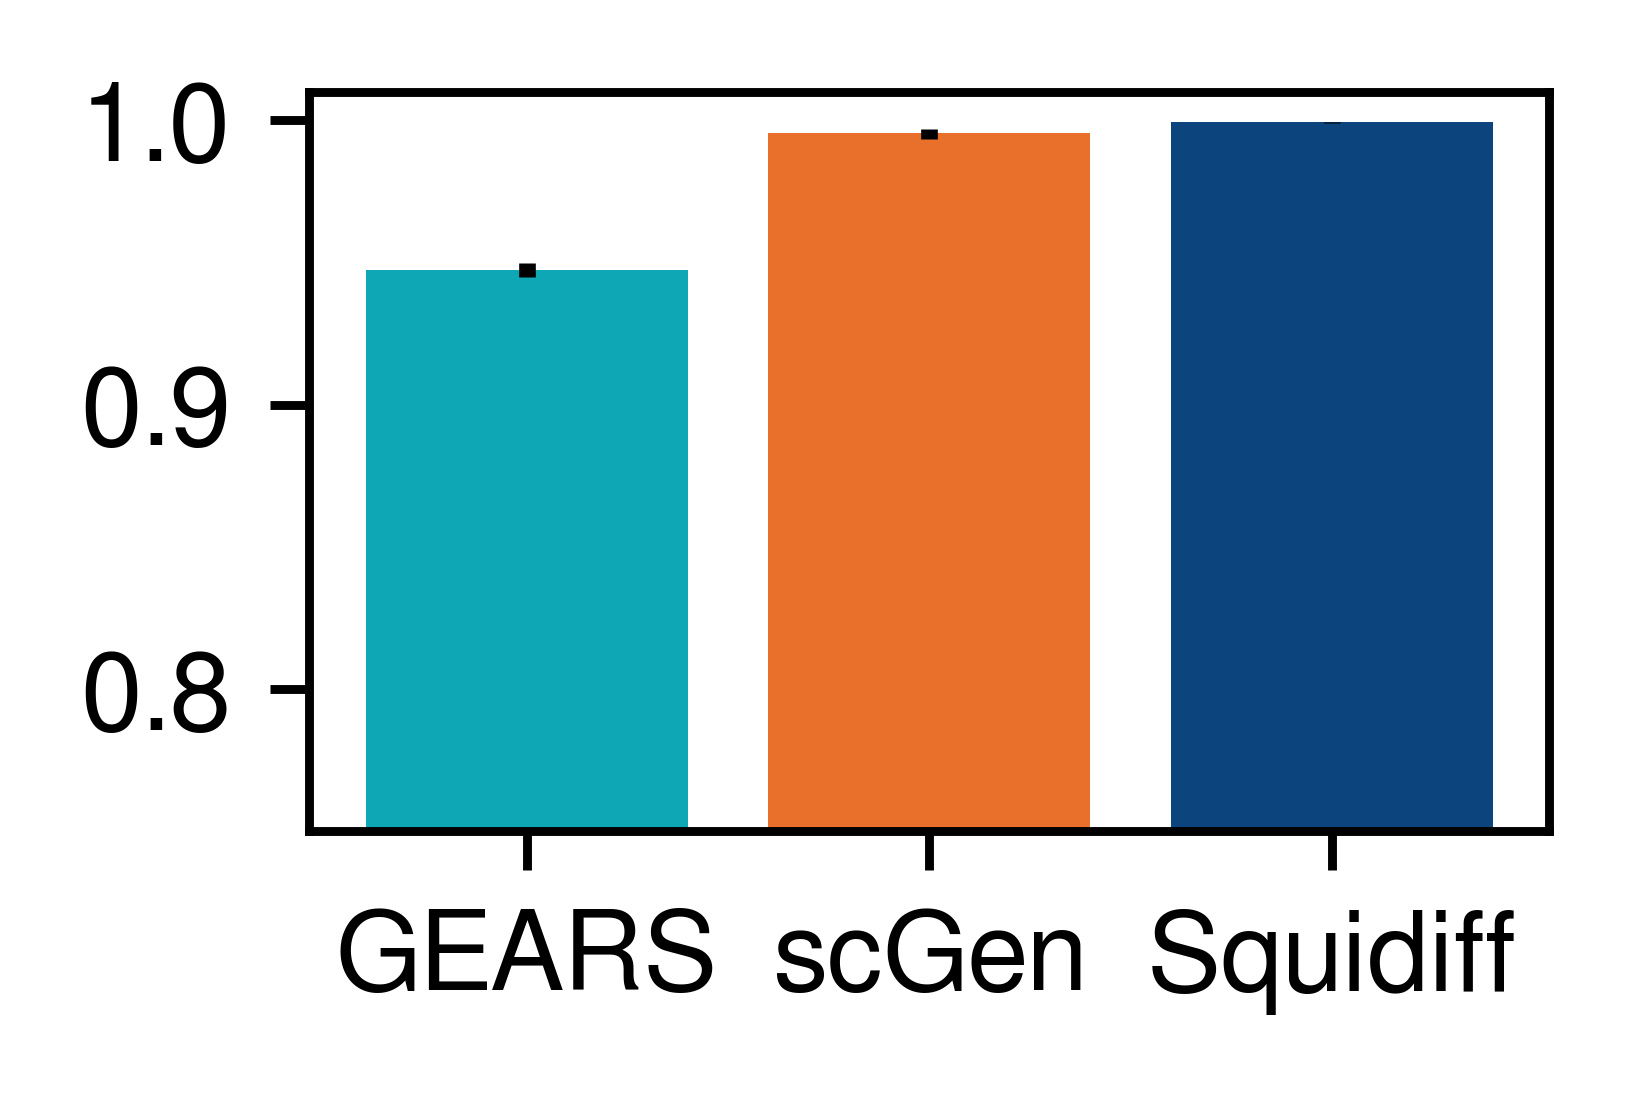

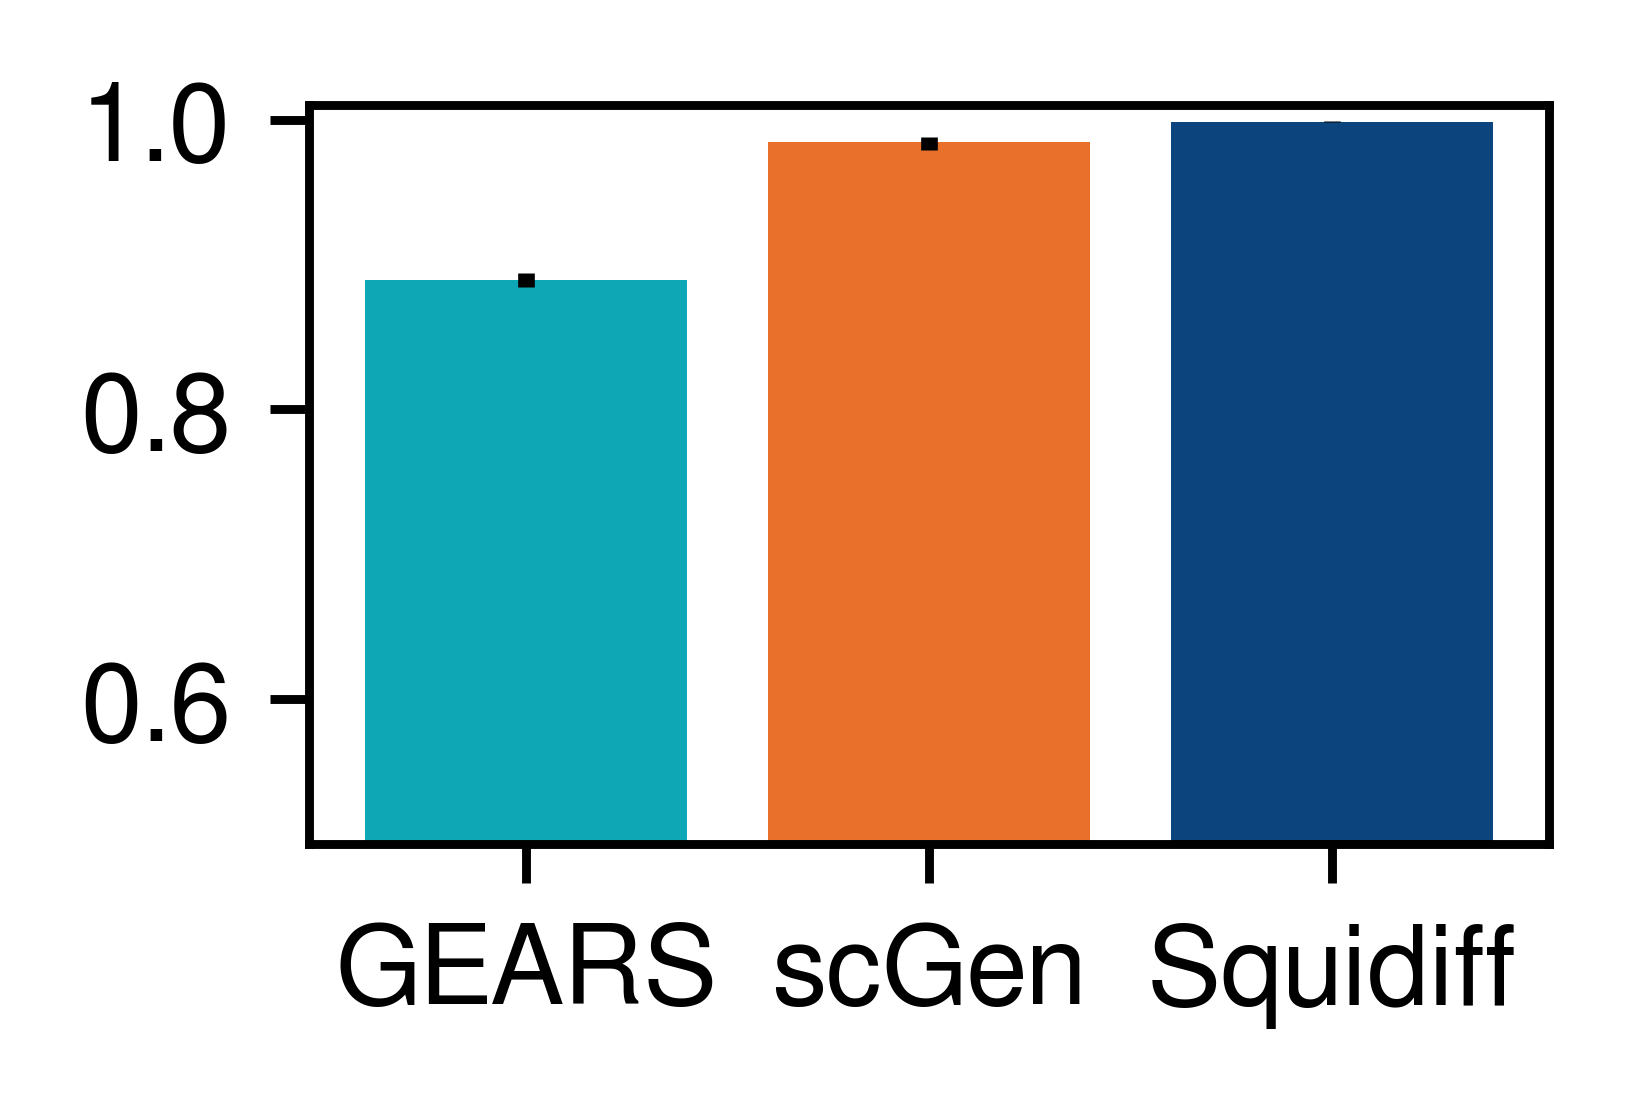

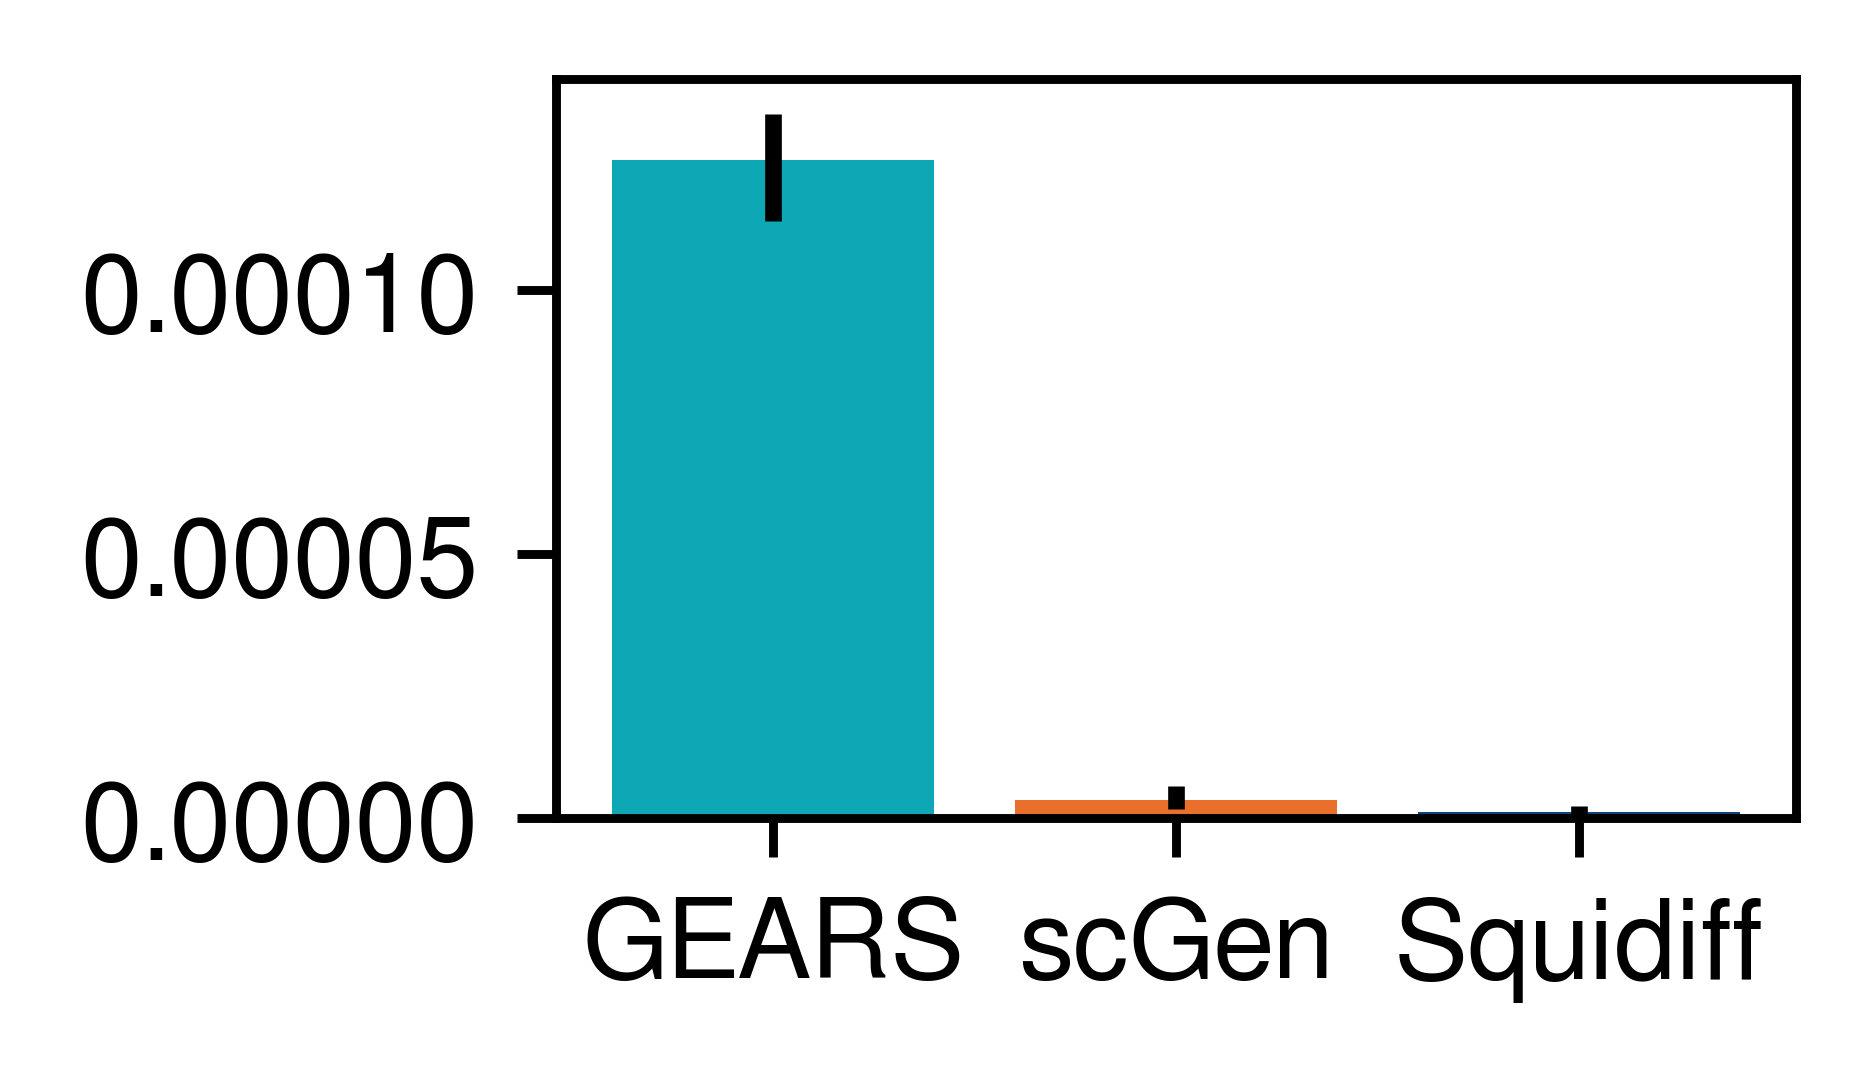

In [281]:

from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.metrics.pairwise import rbf_kernel


def calculate_metrics(x, y):
    r, _ = pearsonr(x, y)
    r2 = r2_score(x, y)
    return r, r2

def calculate_mmd(x, y, gamma=0.05):
    xx = rbf_kernel(x[:, np.newaxis], x[:, np.newaxis], gamma)
    yy = rbf_kernel(y[:, np.newaxis], y[:, np.newaxis], gamma)
    xy = rbf_kernel(x[:, np.newaxis], y[:, np.newaxis], gamma)
    mmd = xx.mean() + yy.mean() - 2 * xy.mean()
    return mmd

# Bootstrap resampling
def bootstrap_metrics(adata1, adata2, n_iterations=10):
    r_values = []
    r2_values = []
    mmd_values = []

    n_cells1 = adata1.shape[0]
    n_cells2 = adata2.shape[0]

    for _ in range(n_iterations):
        indices1 = np.random.choice(n_cells1, n_cells1, replace=True)
        indices2 = np.random.choice(n_cells2, n_cells2, replace=True)
        
        x_resampled = np.mean(adata1.X[indices1], axis=0).flatten()
        y_resampled = np.array(np.mean(adata2.X[indices2], axis=0)).flatten()


        r, r2 = calculate_metrics(x_resampled, y_resampled)
        mmd = calculate_mmd(x_resampled, y_resampled)

        r_values.append(r)
        r2_values.append(r2)
        mmd_values.append(mmd)

    return np.array(r_values), np.array(r2_values), np.array(mmd_values)

# Perform bootstrapping for the datasets
r_values, r2_values, mmd_values = bootstrap_metrics(all_new_data_2, all_new_data_ctrl2)
r_values_gears, r2_values_gears, mmd_values_gears = bootstrap_metrics(all_new_data_gears2[:, all_new_data_ctrl2.var_names], all_new_data_ctrl2)
r_values_scgen, r2_values_scgen, mmd_values_scgen = bootstrap_metrics(all_new_data_scgen2, all_new_data_ctrl2)

# Calculate confidence intervals
r_ci = np.percentile(r_values, [2.5, 97.5])
r2_ci = np.percentile(r2_values, [2.5, 97.5])
mmd_ci = np.percentile(mmd_values, [2.5, 97.5])

r_ci_gears = np.percentile(r_values_gears, [2.5, 97.5])
r2_ci_gears = np.percentile(r2_values_gears, [2.5, 97.5])
mmd_ci_gears = np.percentile(mmd_values_gears, [2.5, 97.5])

r_ci_scgen = np.percentile(r_values_scgen, [2.5, 97.5])
r2_ci_scgen = np.percentile(r2_values_scgen, [2.5, 97.5])
mmd_ci_scgen = np.percentile(mmd_values_scgen, [2.5, 97.5])

# Display results
print("Pearson correlation: mean =", np.mean(r_values), ", 95% CI =", r_ci)
print("R-squared: mean =", np.mean(r2_values), ", 95% CI =", r2_ci)
print("MMD: mean =", np.mean(mmd_values), ", 95% CI =", mmd_ci)

print("Pearson correlation (GEARS): mean =", np.mean(r_values_gears), ", 95% CI =", r_ci_gears)
print("R-squared (GEARS): mean =", np.mean(r2_values_gears), ", 95% CI =", r2_ci_gears)
print("MMD (GEARS): mean =", np.mean(mmd_values_gears), ", 95% CI =", mmd_ci_gears)

print("Pearson correlation (scGen): mean =", np.mean(r_values_scgen), ", 95% CI =", r_ci_scgen)
print("R-squared (scGen): mean =", np.mean(r2_values_scgen), ", 95% CI =", r2_ci_scgen)
print("MMD (scGen): mean =", np.mean(mmd_values_scgen), ", 95% CI =", mmd_ci_scgen)


# Perform t-test
t_stat, p_value = ttest_ind(r_values_gears, r_values_scgen)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t_stat, p_value = ttest_ind(r_values_gears, r_values)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t_stat, p_value = ttest_ind(r_values, r_values_scgen)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Perform t-test
t_stat, p_value = ttest_ind(r2_values_gears, r2_values_scgen)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t_stat, p_value = ttest_ind(r2_values_gears, r2_values)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t_stat, p_value = ttest_ind(r2_values, r2_values_scgen)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Perform t-test
t_stat, p_value = ttest_ind(mmd_values_gears, mmd_values_scgen)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t_stat, p_value = ttest_ind(mmd_values_gears, mmd_values)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t_stat, p_value = ttest_ind(mmd_values, mmd_values_scgen)
print("t-statistic:", t_stat)
print("p-value:", p_value)


import matplotlib.pyplot as plt

# Data for plotting
metrics = ['Pearson Correlation', 'R-squared', 'MMD']
methods = [ 'GEARS', 'scGen','Squidiff']

means = [
    
    [np.mean(r_values_gears), np.mean(r2_values_gears), np.mean(mmd_values_gears)],
    [np.mean(r_values_scgen), np.mean(r2_values_scgen), np.mean(mmd_values_scgen)],
    [np.mean(r_values), np.mean(r2_values), np.mean(mmd_values)]
]

cis = [
    
    [r_ci_gears, r2_ci_gears, mmd_ci_gears],
    [r_ci_scgen, r2_ci_scgen, mmd_ci_scgen],
    [r_ci, r2_ci, mmd_ci],
]

from statannotations.Annotator import Annotator

for i, metric in enumerate(metrics):
    means_metric = [mean[i] for mean in means]
    ci_metric = [ci[i] for ci in cis]
    lower_bounds = [mean - ci[0] for mean, ci in zip(means_metric, ci_metric)]
    upper_bounds = [ci[1] - mean for mean, ci in zip(means_metric, ci_metric)]

    # Plotting
    fig, axes = plt.subplots(1, 1, figsize=(2,1.2),dpi=800)
    g1=plt.bar(methods, means_metric, yerr=[lower_bounds, upper_bounds], 
                capsize=0, 
                 color=['#0ea7b5', '#e8702a','#0c457d'])
    #plt.title(metric)
    if metric=='Pearson Correlation':
        plt.ylim([0.75,1.01])
    if metric=='R-squared':
        plt.ylim([0.5,1.01])
#plt.suptitle('Bootstrap Metrics with 95% Confidence Intervals')
plt.show()